# Individual Project - Military spending and GDP for G19
## Junior OVINCE
___________________________________________________________________________________________________________________________

## DATS 6103 - Introduction to data mining 
## Professor - Nima Zahadat 
### Fall 2017

This project is divided into 6 major sections. Each section focused on the general rubrics of the assignment. After uploading the datasets in section 1, I calculate some descriptive statistics in section 2. All of the other sections emphasized on the key questions for the assignment such as the military spending's comparison to GDP, GDP per capita and overall.  

# Section 1. Setting up the environment and uploading the data 

## Uploading packages and datasets  

In [1]:
#Uplad of third library packages pandas and numpy
import pandas as pd
import numpy as np

In [2]:
#upload packages for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.precision', 2)

In [4]:
%matplotlib inline

## Description of the datasets 
- time series observations of G19 in terms of military spending and GDP 
- 4 datasets: 1) GDP (constant 2010), 2) GDP per capita, 3) military spending (constant 2015), 4) military spending per capita
- GDP and military spending are in millions of USD 
- GDP per capita and military per capita in USD 
- Choice of GDP and military spending in constant value for better comparison between countries and over time
- Each dataset has 418 obsevations (19 countries, 22 years)

I consulted the following websites for the datasets:
1. Stockholm International Peace Research Institute (SIPRI) for all the military spending data:
https://www.sipri.org/databases/milex
2. The World Bank for all the GDP data
https://data.worldbank.org/indicator/NY.GDP.MKTP.KD


## Upload the data and creation of dataframes 

In [5]:
#GDP (constant 2010) - in million of USD
gdp_constant = pd.read_csv('GDP_constant.csv', index_col='country')
#convert the data in millions as it is in military spending for better comparison
gdp_constant = gdp_constant.div(float(1000000)) 

#GDP per capita - in USD 
gdp_per_capita = pd.read_csv('GDP_per_capita.csv', index_col='country')


#Military spending (constant 2015) - in million of USD
military_spending = pd.read_csv('military_spending.csv', index_col='country')

#Military spending per capita - in USD
military_spending_per_capita = pd.read_csv('military_spending_per_capita.csv', index_col='country')


### Quick check on  the data uploaded 

In [6]:
gdp_constant.head(3)

1995      1996      1997      1998      1999      2000  \
country                                                                 
Australia  6.88e+05  7.15e+05  7.44e+05  7.77e+05  8.15e+05  8.47e+05   
Argentina  2.67e+05  2.82e+05  3.05e+05  3.16e+05  3.06e+05  3.03e+05   
Brazil     1.39e+06  1.42e+06  1.47e+06  1.47e+06  1.48e+06  1.54e+06   

               2001      2002      2003      2004    ...         2007  \
country                                              ...                
Australia  8.63e+05  8.97e+05  9.24e+05  9.62e+05    ...     1.06e+06   
Argentina  2.90e+05  2.58e+05  2.81e+05  3.06e+05    ...     3.93e+05   
Brazil     1.56e+06  1.61e+06  1.63e+06  1.72e+06    ...     1.96e+06   

               2008      2009      2010      2011      2012      2013  \
country                                                                 
Australia  1.10e+06  1.12e+06  1.14e+06  1.17e+06  1.21e+06  1.24e+06   
Argentina  4.09e+05  3.85e+05  4.24e+05  4.49e+05  4.44e+05  4.55e+05   
Brazil     2.06e+06  2.05e+06  2.21e+06  2.30e+06  2.34e+06  2.41e+06   

               2014      2015      2016  
country                                  
Australia  1.28e+06  1.31e+06  1.34e+06  
Argentina  4.44e+05  4.55e+05  4.45e+05  
Brazil     2.42e+06  2.33e+06  2.25e+06  

[3 rows x 22 columns]

In [7]:
gdp_per_capita.tail(3)

1995      1996      1997      1998      1999  \
country                                                                
United Kingdom      22755.56  23947.96  26357.53  27759.33  28154.37   
Russian Federation   2665.74   2643.90   2737.56   1834.85   1330.75   
South Korea         12332.98  13137.91  12131.87   8085.32  10409.33   

                        2000      2001      2002      2003      2004  \
country                                                                
United Kingdom      27769.93  27284.22  29603.47  34007.89  39824.76   
Russian Federation   1771.59   2100.36   2375.06   2975.13   4102.37   
South Korea         11947.58  11252.91  12782.53  14209.39  15907.67   

                      ...         2007      2008      2009      2010  \
country               ...                                              
United Kingdom        ...     49949.15  46523.27  38010.10  38709.91   
Russian Federation    ...      9101.25  11635.26   8562.81  10674.99   
South Korea           ...     23060.71  20430.64  18291.92  22086.95   

                        2011      2012      2013      2014      2015      2016  
country                                                                         
United Kingdom      41240.42  41538.31  42407.37  46412.12  43929.69  39899.39  
Russian Federation  14212.06  15154.46  15543.68  14125.91   9329.30   8748.36  
South Korea         24079.79  24358.78  25890.02  27811.37  27105.08  27538.81  

[3 rows x 22 columns]

In [8]:
military_spending.tail(3)

1995    1996    1997    1998    1999    2000    2001  \
country                                                                  
Turkey           13326   14919   15544   16287   17983   17404   15955   
United Kingdom   49369   49074   47528   47792   47733   48981   50964   
United States   433733  410141  408020  398803  399787  415259  418631   

                  2002    2003    2004   ...      2007    2008    2009  \
country                                  ...                             
Turkey           16976   15321   13982   ...     13656   13809   14777   
United Kingdom   54265   58167   58846   ...     61610   64360   65610   
United States   470042  534984  583090   ...    636674  683776  738621   

                  2010    2011    2012    2013    2014    2015    2016  
country                                                                 
Turkey           14478   14619   14939   15310   15397   15881   14974  
United Kingdom   64230   61518   58896   56408   54938   53862   54217  
United States   758890  749533  706918  650851  610636  596010  606233  

[3 rows x 22 columns]

In [9]:
military_spending_per_capita.head(3)

1995   1996   1997   1998   1999   2000   2001   2002   2003  \
country                                                                    
Argentina  108.6   95.4   93.2   93.8   94.5   88.2   85.0   29.4   35.9   
Australia  423.0  447.8  428.7  379.9  411.0  380.7  364.8  407.2  503.0   
Brazil      88.0   85.1   83.0   84.2   57.0   64.5   61.3   53.4   45.7   

            2004   ...     2007   2008   2009    2010    2011    2012    2013  \
country            ...                                                          
Argentina   37.8   ...     57.5   69.1   73.1    84.3    97.3   108.4   120.8   
Australia  600.2   ...    819.3  871.9  870.9  1047.6  1179.9  1144.3  1066.8   
Brazil      52.5   ...    106.3  125.5  130.4   171.2   184.2   167.9   160.9   

             2014    2015    2016  
country                            
Argentina   115.9   126.3   118.8  
Australia  1091.5  1003.0  1012.7  
Brazil      158.5   118.4   113.0  

[3 rows x 22 columns]

# Section 2. Some descriptive statistics 

The focus is on average of all the variables. I calculated the average per country for the entire period and per year in order to depict any trend in the data. When possible, I sorted the variables in descending order in order to have a sense of the median. I wrote some functions and do some graphs.  

In [10]:
# a function to calculate the mean per country over the 22 years. 

def average_country(df):
    ''' This function takes a dataframe as an argument and return another dataframe of means sorted in descending order
    '''
    df['Average'] = df.mean(axis=1)
    df1 = df.sort_values(by = 'Average', ascending = False, inplace=True)
    df1 = df.reset_index()
    df1.drop([str(year) for year in range(1995,2016+1)], axis=1, inplace=True)
    df1.index = df1.index + 1
    
    del df['Average']
    
    return df1

### Average per country for each variable 

In [11]:
#military spending 
average_ms = average_country(military_spending)
average_ms.head(3)

country    Average
1   United States  565541.68
2           China  103365.64
3  United Kingdom   55792.05

In [12]:
#military spending per capita
average_ms_pc = average_country(military_spending_per_capita)
average_ms_pc.tail(3)

country  Average
17     Mexico    39.70
18      India    23.94
19  Indonesia    15.61

In [13]:
#gdp
average_gdp = average_country(gdp_constant)
average_gdp.tail(3)

country    Average
17  Saudi Arabia  480454.55
18     Argentina  359590.91
19  South Africa  328454.55

In [14]:
#gdp per capita
average_gdp_pc = average_country(gdp_per_capita)
average_gdp_pc.head(3)

country   Average
1  United States  43471.15
2      Australia  38402.55
3          Japan  38332.41

### visualization of the average per country over the 22 years  

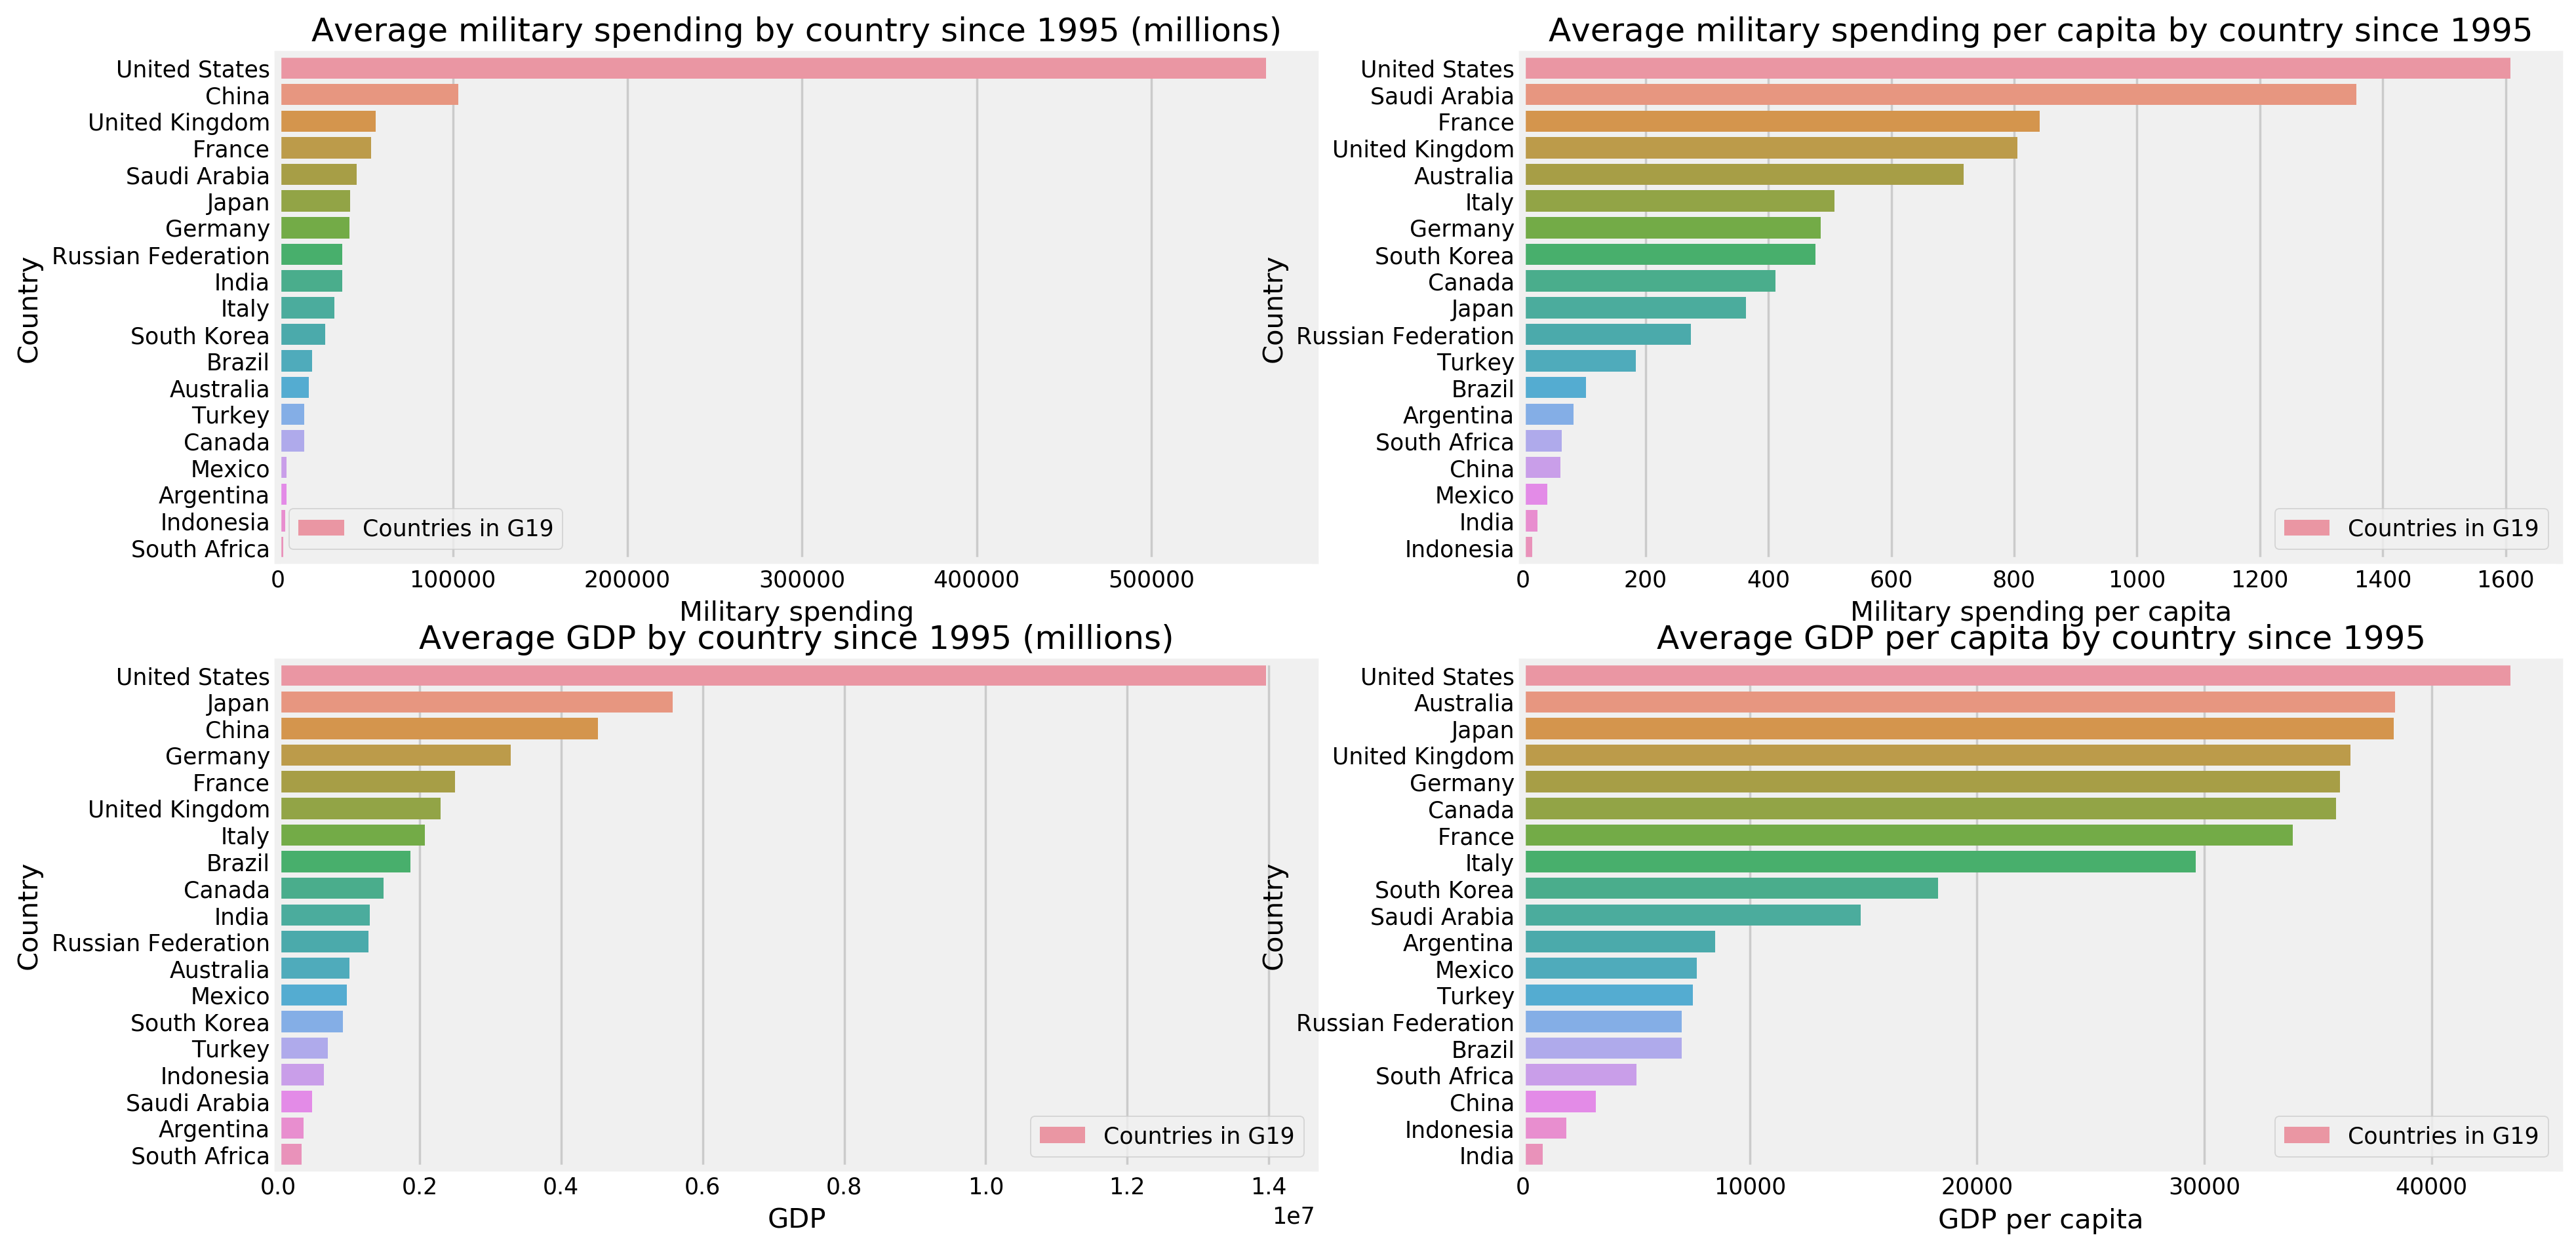

In [140]:
fig = plt.figure(figsize=(16,9),dpi=250) # create a plot figure divided into 4 panels

# create the first of four panels and set current axis
plt.subplot(2, 2, 1) # (rows, columns, panel number)
sns.barplot(x=average_ms['Average'], y=average_ms['country'], data=average_ms, label ="Countries in G19")
plt.title("Average military spending by country since 1995 (millions)")
plt.xlabel("Military spending")
plt.ylabel("Country")
plt.legend()

# create the second of four panels and set current axis
plt.subplot(2, 2, 2) # (rows, columns, panel number)
sns.barplot(x=average_ms_pc['Average'], y=average_ms_pc['country'], data=average_ms_pc, label ="Countries in G19")
plt.title("Average military spending per capita by country since 1995")
plt.xlabel("Military spending per capita")
plt.ylabel("Country")
plt.legend()



# create the third of four panels and set current axis
plt.subplot(2, 2, 3) # (rows, columns, panel number)
sns.barplot(x=average_gdp['Average'], y=average_gdp['country'], data=average_gdp, label ="Countries in G19")
plt.title("Average GDP by country since 1995 (millions)")
plt.xlabel("GDP")
plt.ylabel("Country")
plt.legend()


# create the last of four panels and set current axis
plt.subplot(2, 2, 4) # (rows, columns, panel number)
sns.barplot(x=average_gdp_pc['Average'], y=average_gdp_pc['country'], data=average_gdp_pc, label ="Countries in G19")
plt.title("Average GDP per capita by country since 1995")
plt.xlabel("GDP per capita")
plt.ylabel("Country")
plt.legend()

### Average per year for each variable 

In [16]:
# a function to calculate the mean per year for all the G19 countries.

def average_year(df):
    ''' This function takes a dataframe as an argument and return another dataframe of means sorted in descending order
    '''
    df1= df.mean()
    df1 = pd.DataFrame(df1)
    df1.columns = ['Average']
    
    return df1

In [17]:
#military spending
average_ms_yrs = average_year(military_spending)
average_ms_yrs.head(3)

Average
1995  43469.37
1996  42269.37
1997  42846.42

In [18]:
#military spending per capita
average_ms_pc_yrs = average_year(military_spending_per_capita)
average_ms_pc_yrs.head(3)

Average
1995   317.19
1996   313.78
1997   312.65

In [19]:
#GDP
average_gdp_yrs = average_year(gdp_constant)
average_gdp_yrs.tail(3)

Average
2014  2.98e+06
2015  3.06e+06
2016  3.14e+06

In [20]:
#GDP per capita 
average_gdp_pc_yrs = average_year(gdp_per_capita)
average_gdp_pc_yrs.tail(3)

Average
2014  26874.13
2015  24238.73
2016  23828.69

### visualization of the average per year for the 19 countries 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BAB9753CC0>], dtype=object)

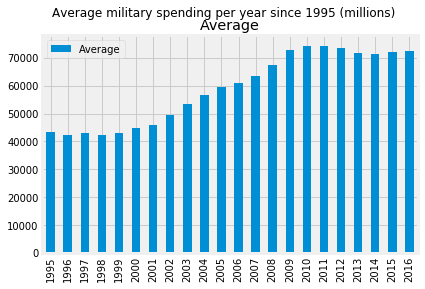

In [21]:
#military spending
average_ms_yrs.plot(kind= 'bar', subplots=True, title='Average military spending per year since 1995 (millions)')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BABA1E9CF8>], dtype=object)

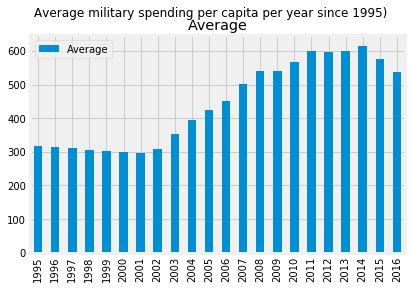

In [22]:
#military spending per capita 
average_ms_pc_yrs.plot(kind= 'bar', subplots=True, title ='Average military spending per capita per year since 1995)' )


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BABA33DEF0>], dtype=object)

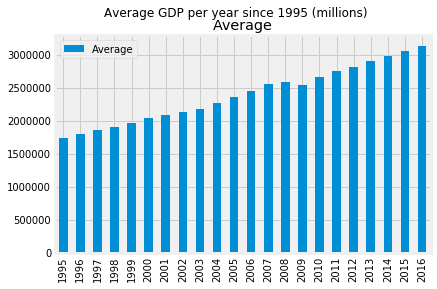

In [23]:
#GDP
average_gdp_yrs.plot(kind= 'bar', subplots=True, title='Average GDP per year since 1995 (millions)')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BABA4742B0>], dtype=object)

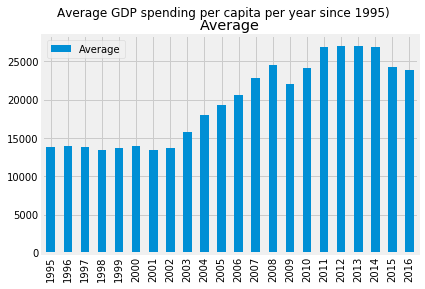

In [24]:
#GDP per capita 
average_gdp_pc_yrs.plot(kind= 'bar', subplots=True, title ='Average GDP spending per capita per year since 1995)' )

# Section 3.- Comparison of a country's military spending to that country's GDP

I have adopted 2 methods to compare these variables 

### i. Defining a weight of military spending on GDP - Military spending share of GDP (percentage) 

a. Dataframe of weight

b. Graph the percentage for each country and graph the topfive shares over the 2 decades)


### ii. Finding the correlation between military spending and GDP

a. Scatter plot between GDP and military spending 

b. Pearson correlation methods 


### i. Dataframe of military weight on GDP (percentage) and visualization

In [26]:
#define a dataframe of weight by dividing the transposed version of the 2 dataframes 

ms_weight_gdp = ((military_spending.T) / (gdp_constant.T)*100).T

In [27]:
ms_weight_gdp.head(4)

1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  ...   \
country                                                                ...    
Argentina  1.93  1.62  1.47  1.43  1.52  1.47  1.51  1.44  1.37  1.29  ...    
Australia  1.87  1.78  1.74  1.75  1.75  1.68  1.71  1.72  1.70  1.70  ...    
Brazil     1.07  0.98  0.94  1.01  1.03  1.07  1.22  1.20  0.94  0.93  ...    
Canada     1.29  1.17  1.03  1.03  1.02  0.95  0.96  0.94  0.94  0.94  ...    

           2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  
country                                                                
Argentina  1.18  1.12  1.29  1.16  1.08  1.08  1.18  1.25  1.21  1.39  
Australia  1.78  1.78  1.88  1.87  1.80  1.68  1.62  1.70  1.84  1.82  
Brazil     0.99  1.00  1.09  1.13  1.05  1.05  1.03  1.04  1.06  1.02  
Canada     1.04  1.11  1.19  1.05  1.05  0.98  0.88  0.88  0.85  0.85  

[4 rows x 22 columns]

### visualization of a country's military shares of GDP

In [34]:
#This function graph the military spending share of gdp for acountry over the whole period. 
def share_ms_gdp(country):
    ''' This function takes a country name (in string) as an argument and return a plot line 
    of all the military shares of GDP since 1995 
    '''
    fig = plt.figure(figsize=(10,3),dpi=250)
    plt.plot(ms_weight_gdp.columns, ms_weight_gdp.loc[country], '-.', label=country)
    plt.title("Military spending share of GDP: "+country)
    plt.xlabel("year")
    plt.ylabel("percentage")
    plt.legend()

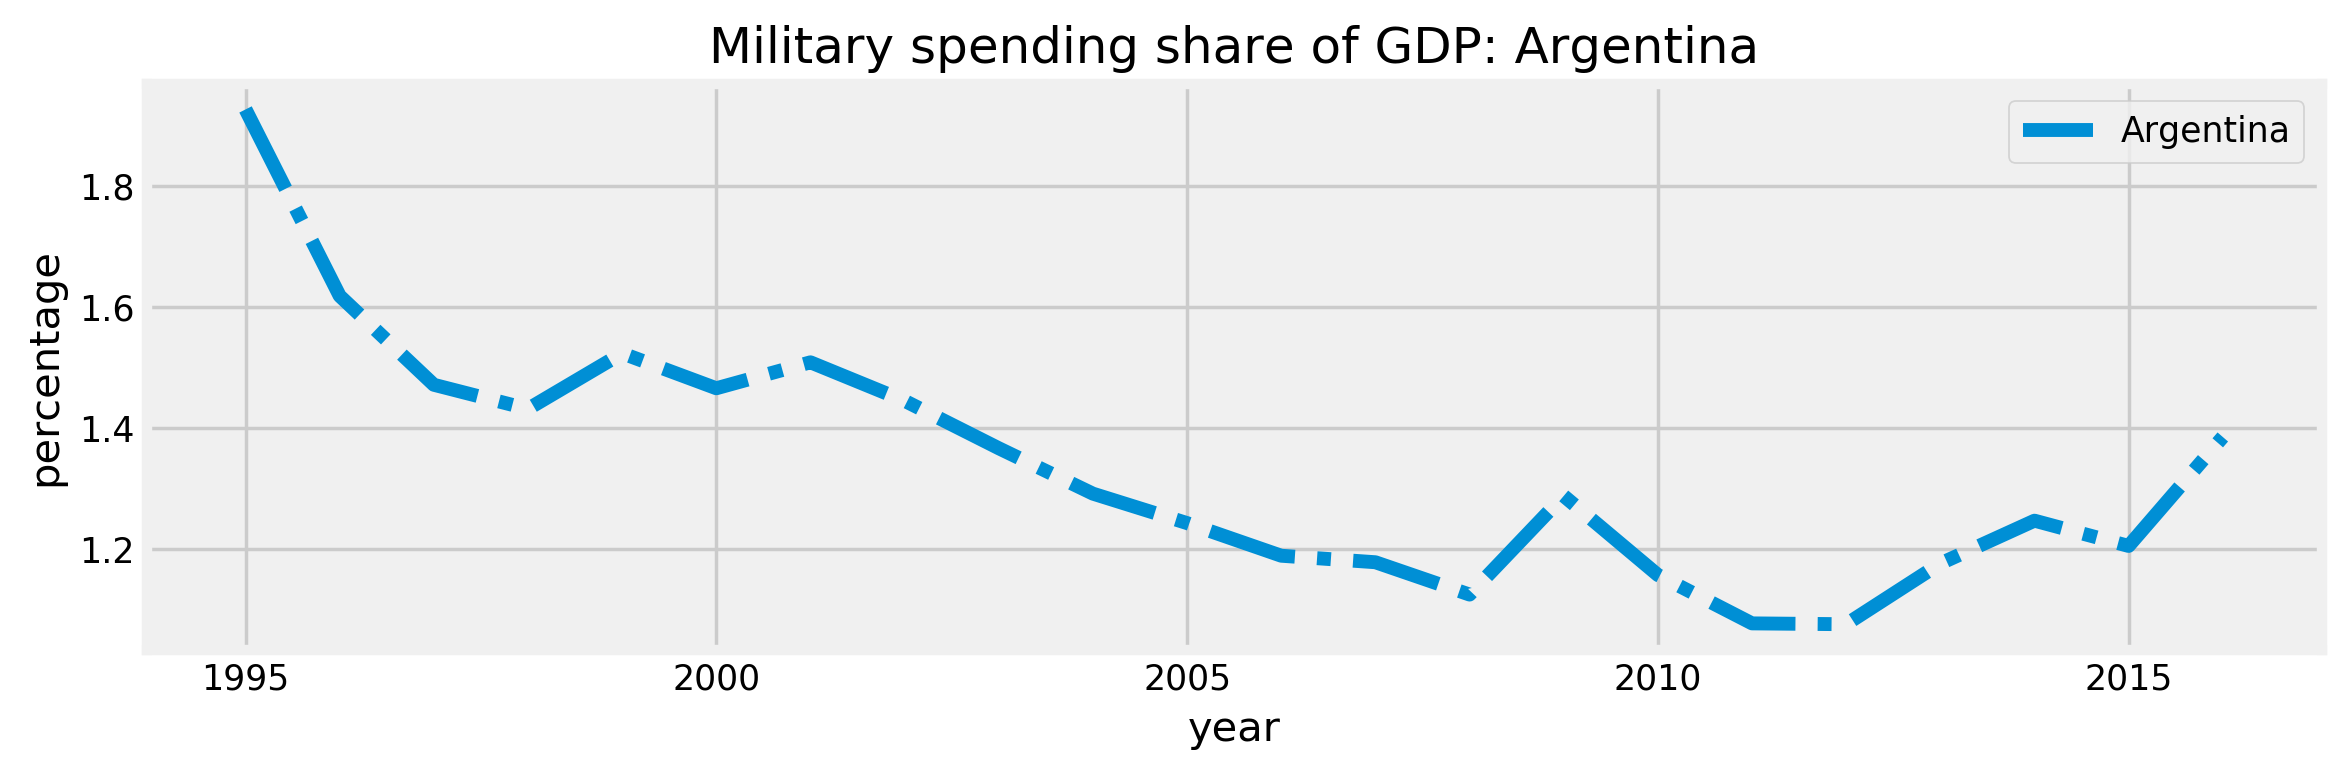

In [35]:
share_ms_gdp("Argentina")

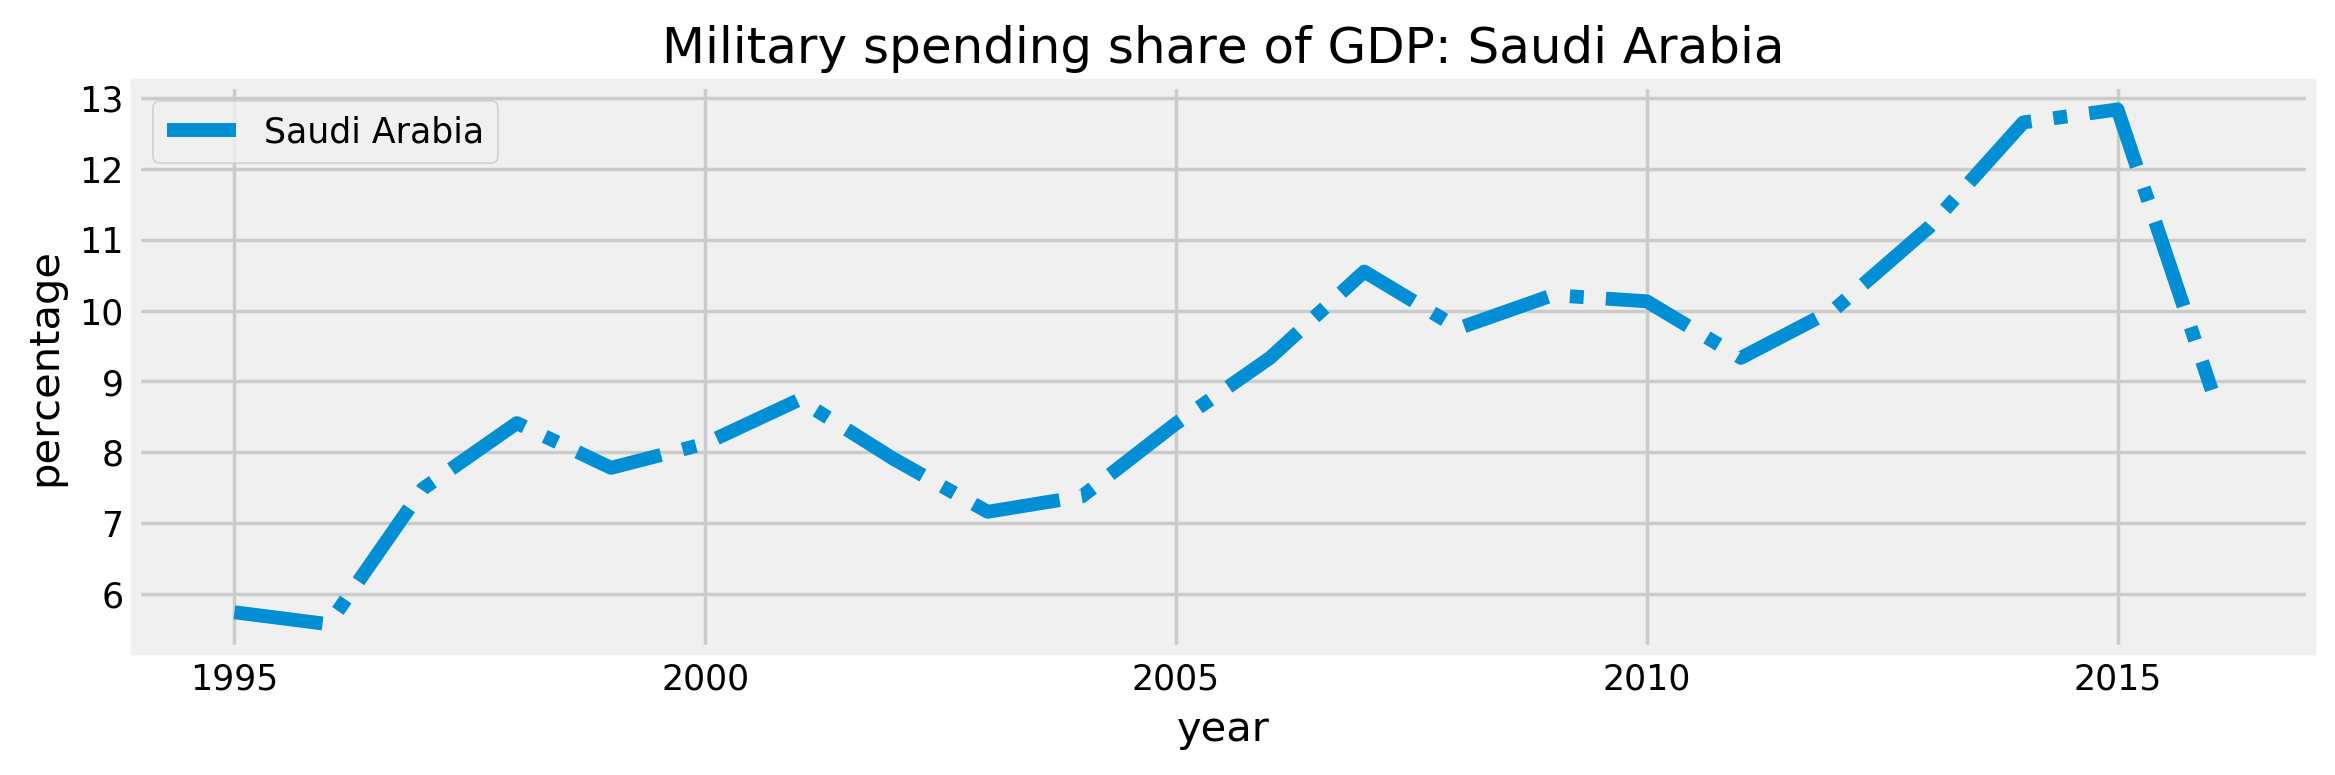

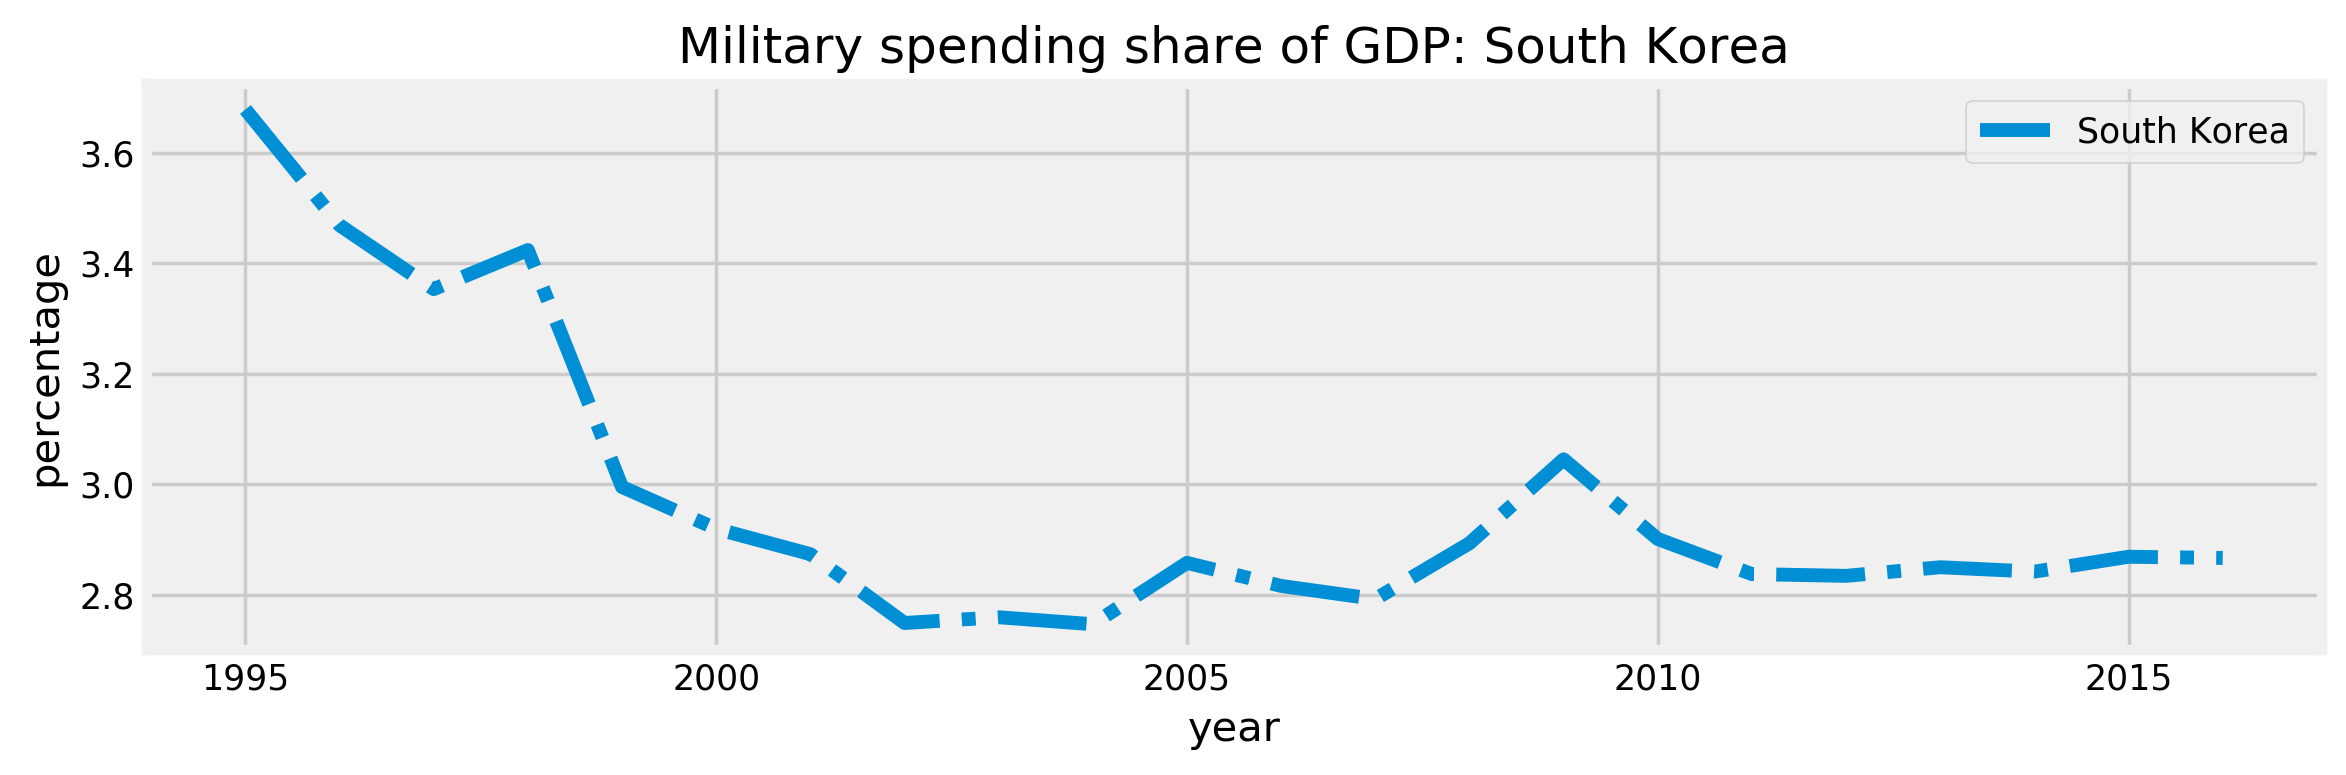

In [36]:
share_ms_gdp('Saudi Arabia')
share_ms_gdp('South Korea')

### Finding the countries with the highest military spending shares of GDP 
First, I wrote 2 functions. The first one finds the top five per year. The second one finds the top fives in a range of years.Then I plotted the results. 

Both functions are defined broadly by taking a dataframe as an argument because I used theses functions in the other sections.

In [37]:
# This function finds the top five military spending shares of GDP per year.  

def topfive(df1, year, total=5):
    ''' This function takes a dataframe, a year, and the number in the top interested (defaulted at 5) and return
    another that dataframe with the names of the tops for the chosen year. 
    '''
    df = df1[str(year)].sort_values(ascending=False).head(total)
    df = df.reset_index()
    df = df.drop(str(year), axis=1)
    df.columns = [str(year)]
    df.index = df.index + 1 
    
    return df

In [38]:
topfive(ms_weight_gdp, 2016)

2016
1        Saudi Arabia
2  Russian Federation
3       United States
4         South Korea
5               China

In [39]:
topfive(ms_weight_gdp, 1995)

1995
1   Saudi Arabia
2  United States
3    South Korea
4          India
5         Turkey

In [40]:
# This function finds the top five military spending shares of GDP in a range of years. 

def topfives(df, year_start, year_end):
    ''' This function is built on the topfive function already defined, and takes a dataframe, a range of year as arguments,
    and returns a dataframe of top fives (default) countries for the range of year. 
    '''
    df =  [topfive(df, year) for year in range(year_start,year_end+1)]
    return df[0].join(df[1:])

In [41]:
topfives(ms_weight_gdp, 2001, 2016)

2001           2002           2003            2004  \
1   Saudi Arabia   Saudi Arabia   Saudi Arabia    Saudi Arabia   
2          India  United States  United States   United States   
3  United States         Turkey          India           India   
4         Turkey          India         Turkey     South Korea   
5    South Korea    South Korea    South Korea  United Kingdom   

             2005                2006                2007                2008  \
1    Saudi Arabia        Saudi Arabia        Saudi Arabia        Saudi Arabia   
2   United States       United States       United States       United States   
3           India               India         South Korea               India   
4     South Korea         South Korea               India         South Korea   
5  United Kingdom  Russian Federation  Russian Federation  Russian Federation   

                 2009                2010                2011  \
1        Saudi Arabia        Saudi Arabia        Saudi Arabia   
2       United States       United States       United States   
3               India               India  Russian Federation   
4         South Korea  Russian Federation         South Korea   
5  Russian Federation         South Korea               India   

                 2012                2013                2014  \
1        Saudi Arabia        Saudi Arabia        Saudi Arabia   
2       United States       United States       United States   
3  Russian Federation  Russian Federation  Russian Federation   
4         South Korea         South Korea         South Korea   
5               India               India               China   

                 2015                2016  
1        Saudi Arabia        Saudi Arabia  
2  Russian Federation  Russian Federation  
3       United States       United States  
4         South Korea         South Korea  
5               China               China

In [43]:
topfives(ms_weight_gdp, 1995, 2016)

1995           1996           1997           1998           1999  \
1   Saudi Arabia   Saudi Arabia   Saudi Arabia   Saudi Arabia   Saudi Arabia   
2  United States  United States  United States    South Korea         Turkey   
3    South Korea    South Korea    South Korea  United States          India   
4          India         Turkey          India         Turkey  United States   
5         Turkey          India         Turkey          India    South Korea   

            2000           2001           2002           2003            2004  \
1   Saudi Arabia   Saudi Arabia   Saudi Arabia   Saudi Arabia    Saudi Arabia   
2          India          India  United States  United States   United States   
3         Turkey  United States         Turkey          India           India   
4  United States         Turkey          India         Turkey     South Korea   
5    South Korea    South Korea    South Korea    South Korea  United Kingdom   

          ...                        2007                2008  \
1         ...                Saudi Arabia        Saudi Arabia   
2         ...               United States       United States   
3         ...                 South Korea               India   
4         ...                       India         South Korea   
5         ...          Russian Federation  Russian Federation   

                 2009                2010                2011  \
1        Saudi Arabia        Saudi Arabia        Saudi Arabia   
2       United States       United States       United States   
3               India               India  Russian Federation   
4         South Korea  Russian Federation         South Korea   
5  Russian Federation         South Korea               India   

                 2012                2013                2014  \
1        Saudi Arabia        Saudi Arabia        Saudi Arabia   
2       United States       United States       United States   
3  Russian Federation  Russian Federation  Russian Federation   
4         South Korea         South Korea         South Korea   
5               India               India               China   

                 2015                2016  
1        Saudi Arabia        Saudi Arabia  
2  Russian Federation  Russian Federation  
3       United States       United States  
4         South Korea         South Korea  
5               China               China  

[5 rows x 22 columns]

### visualization of the top fives since 1995

In [44]:
topfives(ms_weight_gdp, 1995, 2016).stack().value_counts() ### among the top five during the whole period

South Korea           22
United States         22
Saudi Arabia          22
India                 19
Russian Federation    11
Turkey                 9
China                  3
United Kingdom         2
dtype: int64

In [109]:
top_weight = topfives(ms_weight_gdp, 1995, 2016).stack().value_counts().index[:6]

In [110]:
top_weight  #create a graphe with it

Index(['South Korea', 'United States', 'Saudi Arabia', 'India',
       'Russian Federation', 'Turkey'],
      dtype='object')

fig = plt.figure(figsize=(10,3),dpi=250)

for country in top_weight:
    share_ms_gdp(country)

    
plt.legend(top_weight)
plt.show()

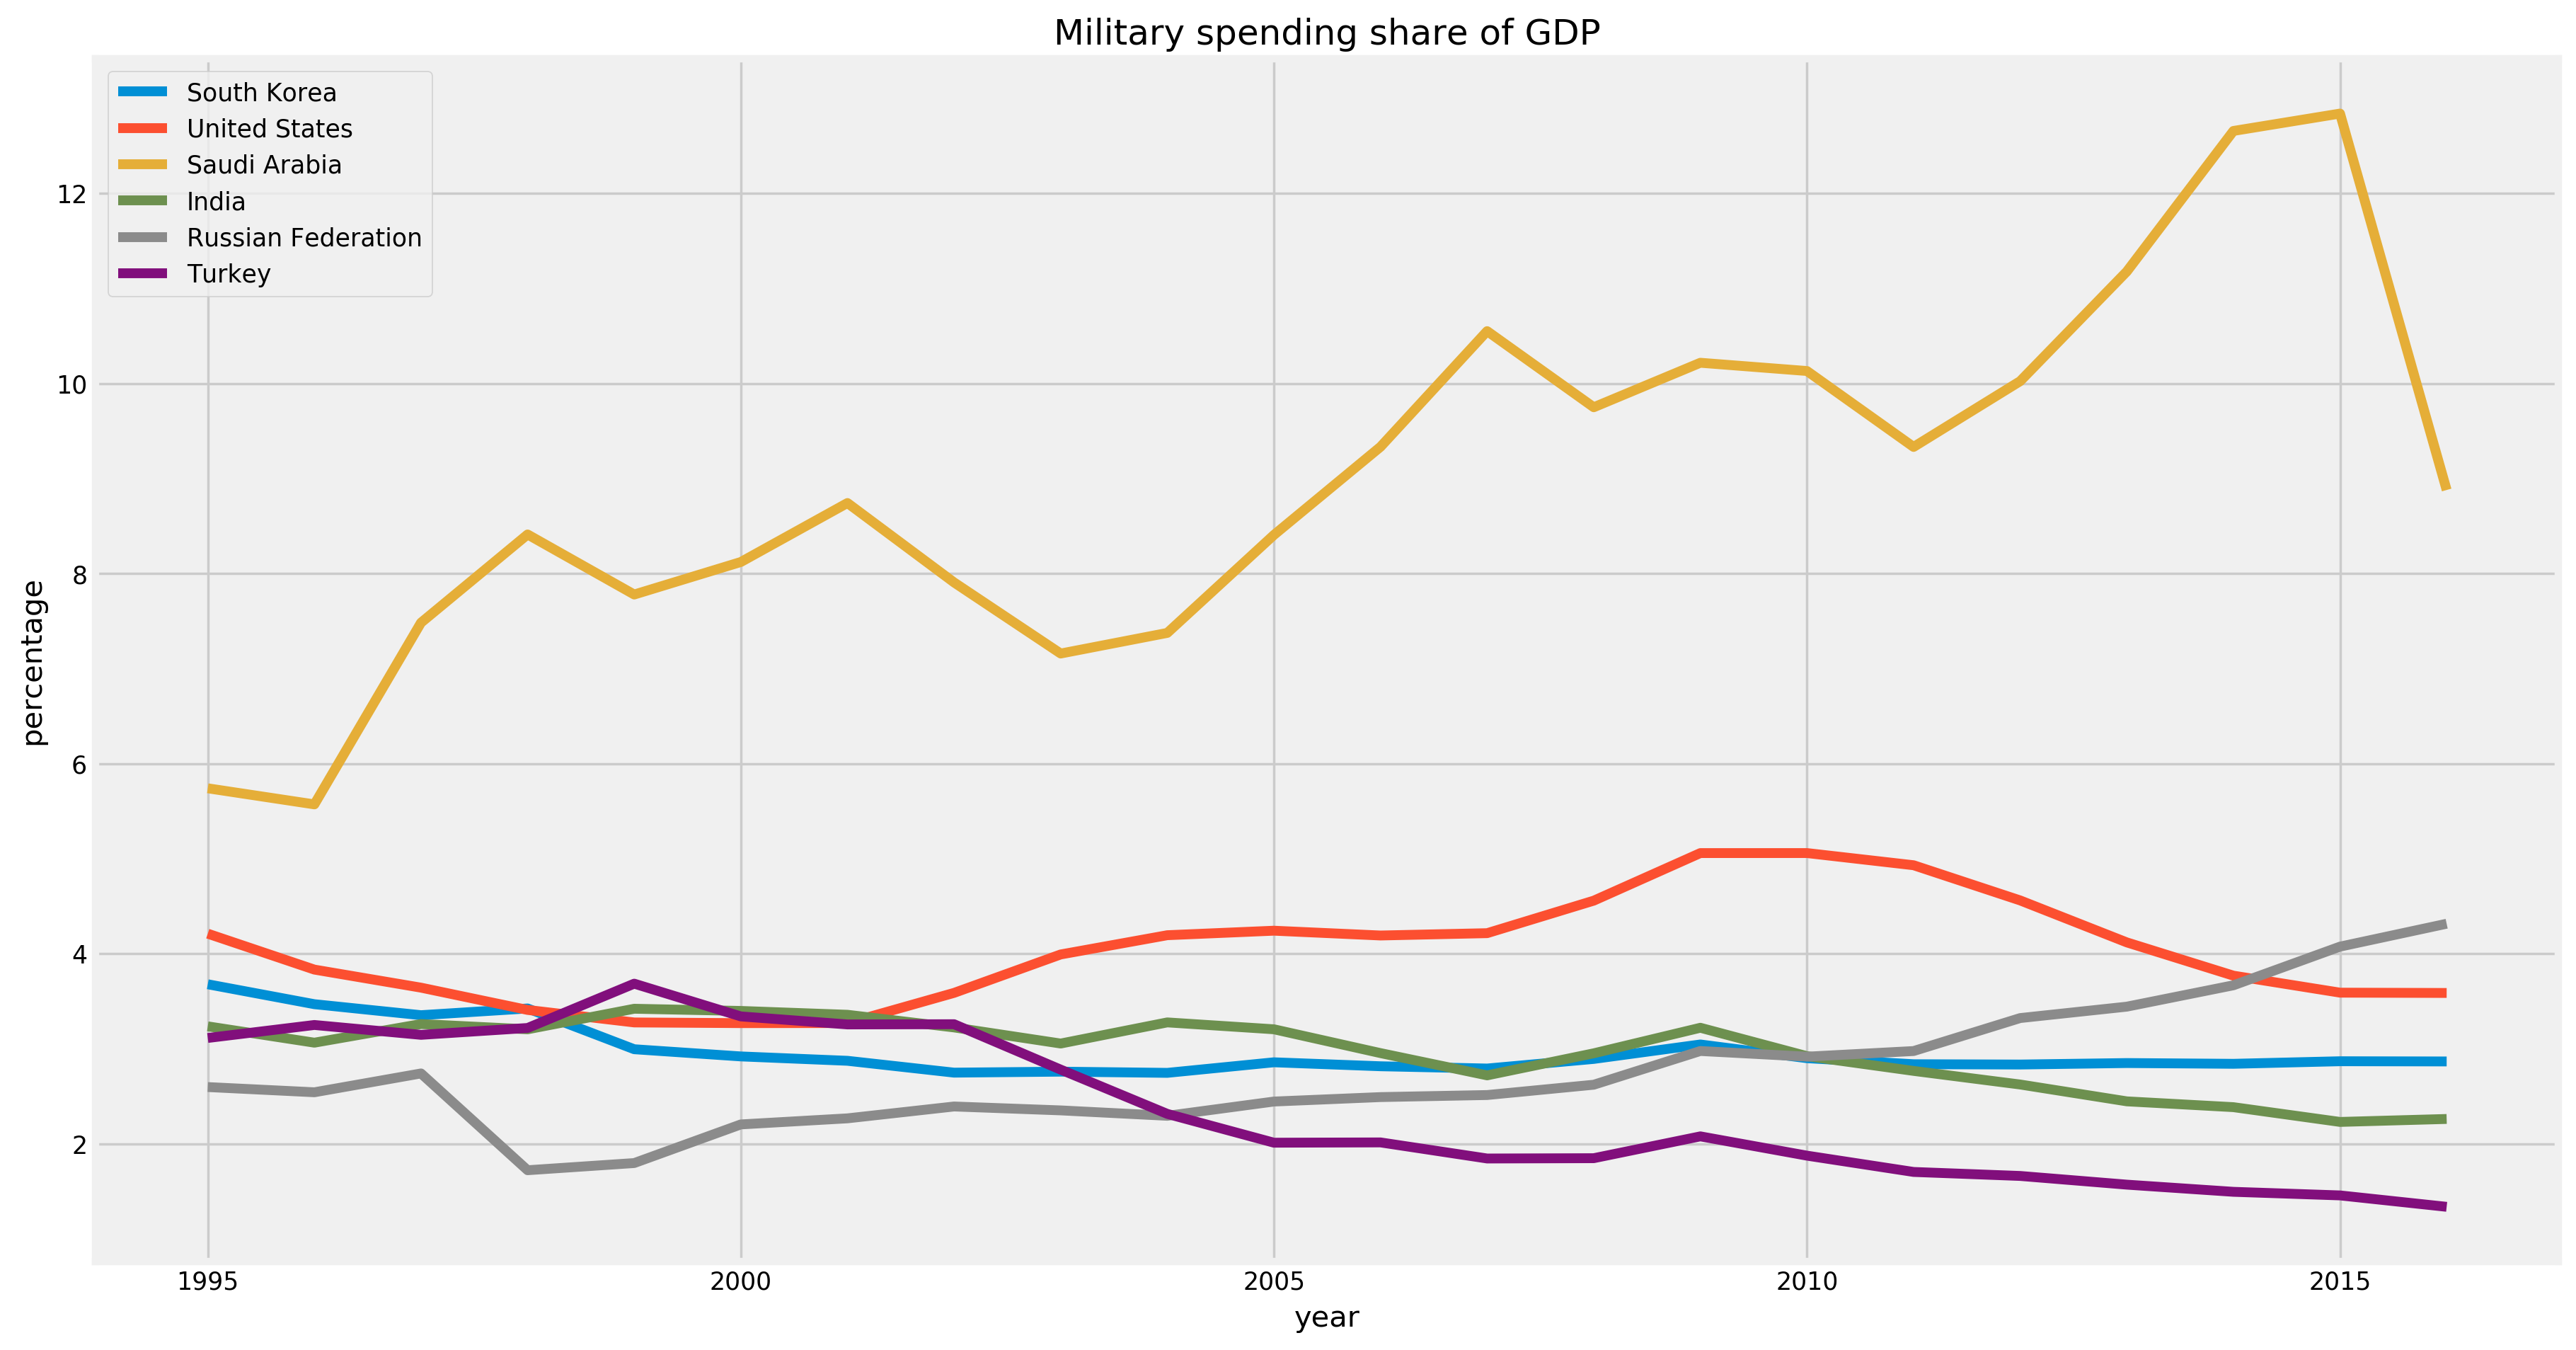

In [48]:
fig = plt.figure(figsize=(16,9),dpi=250)
#for country in top_weight:
plt.plot(ms_weight_gdp.columns, ms_weight_gdp.loc['South Korea'], '-', label='South Korea')
plt.plot(ms_weight_gdp.columns, ms_weight_gdp.loc['United States'], '-', label='United States')
plt.plot(ms_weight_gdp.columns, ms_weight_gdp.loc['Saudi Arabia'], '-', label ='Saudi Arabia')
plt.plot(ms_weight_gdp.columns, ms_weight_gdp.loc['India'], '-', label='India')
plt.plot(ms_weight_gdp.columns, ms_weight_gdp.loc['Russian Federation'], '-', label='Russian Federation')
plt.plot(ms_weight_gdp.columns, ms_weight_gdp.loc['Turkey'], '-', label ='Turkey')
plt.title("Military spending share of GDP")
plt.xlabel("year")
plt.ylabel("percentage")
plt.legend()


### ii. Scatterplot and correlation

I defined one function to create the scatter plot for a country by comparing the trends between variables. I defined this function broadly as I used in other sections as well. 

I defined another functions for the correlation, again broadly, considering the use of these functions in other sections.  

### Scatter plot function

In [49]:
#This function creates a scatter plot per country 

def scatter_country(df, df1, country):
    ''' This function takes 2 dataframes and a country name as arguments,
    and returns a scatter plot with a linear trend in a 95% confidence interval. 
    '''
    fig = plt.figure()
    testdf = pd.concat([df.loc[country], df1.loc[country]], keys =['ms', 'gdp'])
    testdf = testdf.unstack().T
    sns.lmplot(x='ms', y='gdp', data=testdf, size=6, aspect=1.5)
    plt.title("Military spending and GDP: "+ country)
    plt.xlabel("Military spending")
    plt.ylabel("GDP (millions)")
    
    

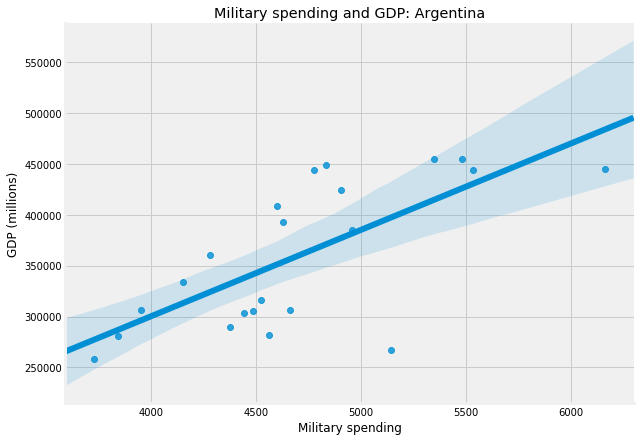

In [50]:
scatter_country(military_spending, gdp_constant, "Argentina")

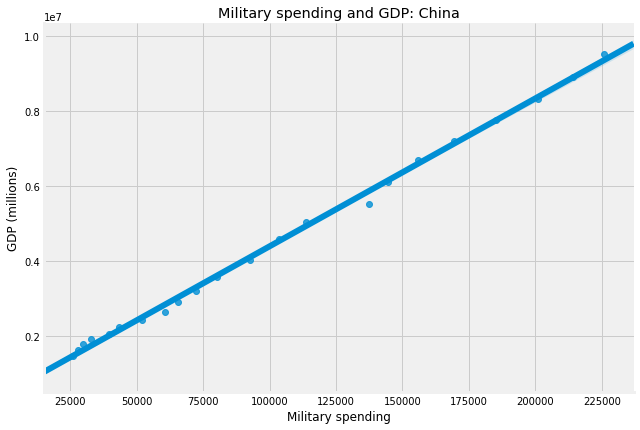

In [51]:
scatter_country(military_spending, gdp_constant, "China")

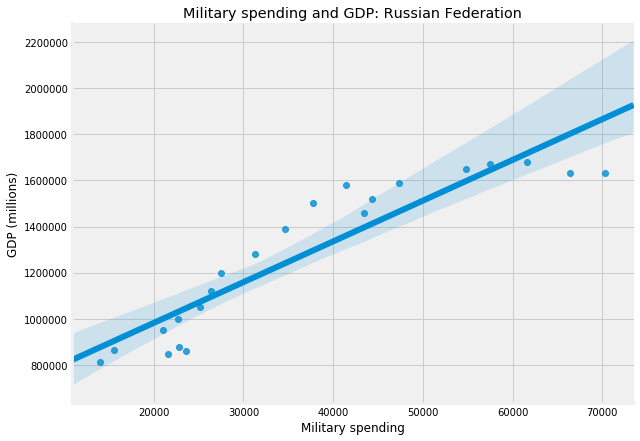

In [52]:
scatter_country(military_spending, gdp_constant, "Russian Federation")

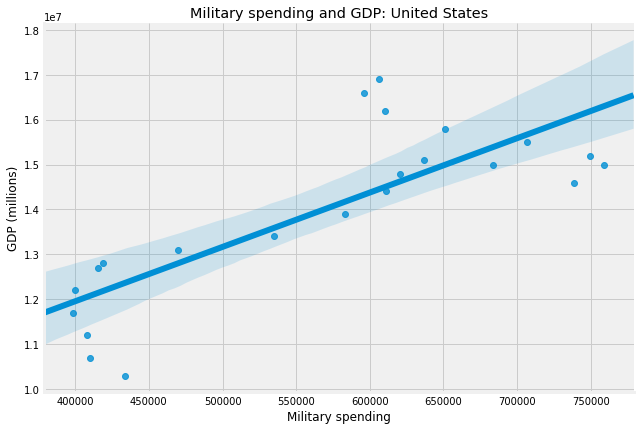

In [53]:
scatter_country(military_spending, gdp_constant, "United States")

### Correlation functions 

In [55]:
#This function defines the correlation between 2 variables for a given country by using the pearson mehod.

def corr_country(df, df1, country):
    ''' This function takes 2 dataframes and a country name as arguments,
    and returns the correlation coeficient between variables. This coefficient determines the strength of 
    the relation between variables. 
    '''
    #spearman method: I should have used this method as the distribution seems not normally distributed. 
    #By using the pearson method I assumed normality in the distributions. 
    corr = df.loc[country].corr(df1.loc[country], method="pearson")
    return corr

In [56]:
corr_country(gdp_constant, military_spending, "Canada")

0.7006268174437692

In [57]:
corr_country(gdp_constant, military_spending, "United States")

0.79911901933375773

In [58]:
corr_country(gdp_constant, military_spending, "China")

0.9987759075951681

In [59]:
corr_country(gdp_constant, military_spending, "Russian Federation")

0.91828000179941049

In [61]:
#This function defines the correlation between 2 variables for all the countries in G19, by using the pearson mehod.

def corr_total(df,df1):
    ''' This function takes 2 dataframes and a country name as arguments,
    and returns the correlation coeficient between variables for all the countries in a dataframe. 
    This coefficient determines the strength of the relation between variables. 
    '''
    countries = ["Argentina", "Australia", "Brazil", "Canada", "China", "France", 'Germany', "India", "Indonesia", 
             "Italy", "Japan", "Mexico", "Russian Federation", "Saudi Arabia", "South Africa", "South Korea",
             "Turkey", "United Kingdom","United States"]
    correl_coeff =[]
    for country in countries:
        corr = df.loc[country].corr(df1.loc[country], method="pearson")
        correl_coeff.append(corr)
    df2 = pd.DataFrame([correl_coeff], columns=countries)
    df2.index = ['Coefficient']
    return df2.T.sort_values(by="Coefficient", ascending=False)


In [62]:
corr_total(gdp_constant, military_spending)

Coefficient
China                      1.00
Australia                  0.98
South Korea                0.98
India                      0.96
Brazil                     0.95
Saudi Arabia               0.95
Indonesia                  0.93
Russian Federation         0.92
Mexico                     0.92
South Africa               0.85
United States              0.80
Canada                     0.70
Argentina                  0.70
United Kingdom             0.67
France                     0.52
Italy                      0.47
Japan                      0.27
Turkey                    -0.18
Germany                   -0.70

In [63]:
corr_country(gdp_constant, military_spending, "Germany")

-0.69654201220027689

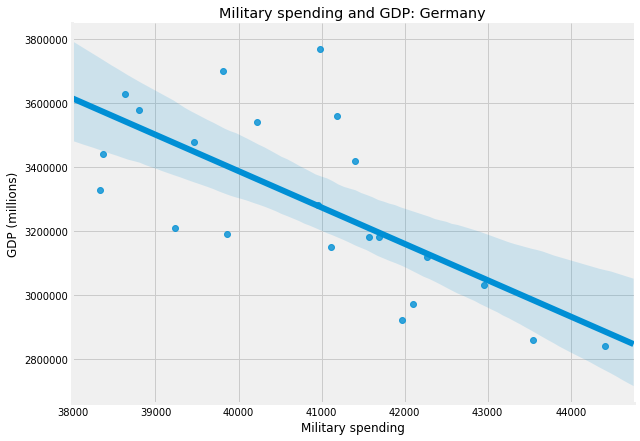

In [64]:
scatter_country(military_spending, gdp_constant, "Germany")

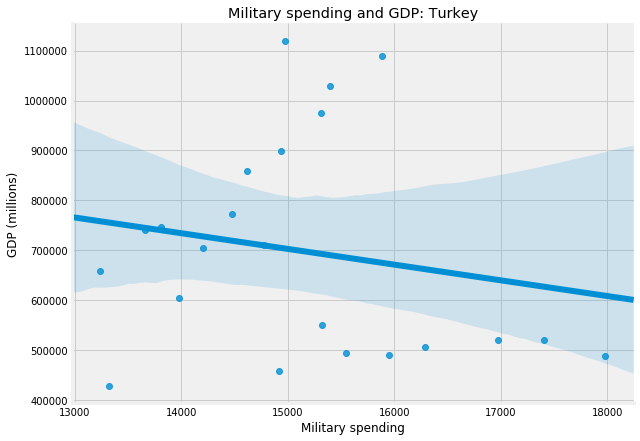

In [65]:
scatter_country(military_spending, gdp_constant, "Turkey")

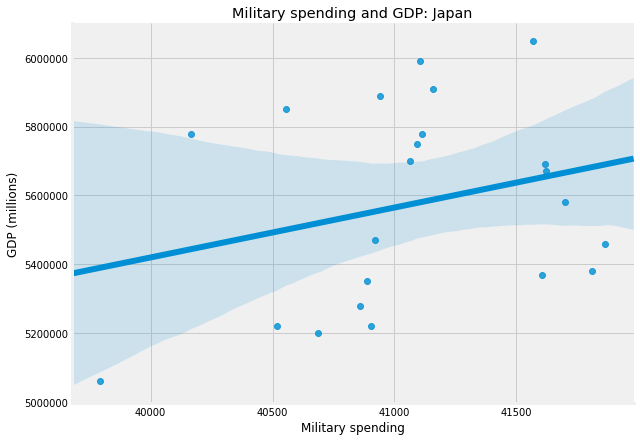

In [66]:
scatter_country(military_spending, gdp_constant, "Japan")

# Section 4. Comparison of a country's military spending to the overall military spending

I have adopted 2 methods to do the comparison of a country's mlitary spending to the overall military spending

### i. Finding the country's percentage of military spending per year and compare it with the overall and over time 

a. Dataframe of percentage of a country's military spending per year  
b. Pie charts over time

### ii. Defining a z-score for a country per year and identifiying the military distribution over time 

a. Z-score 

b. Distribution curve 


### i. Dataframe of a country's military spending percentage for the overall spending in a year and visualization

I defined a function to calculate the percentage of a column in a dataframe then I used the apply method to convert all the row in  dataframe into percentage. 

### percentage function

In [68]:
# This function calculates the percentage in a column of a dataframe. 

# 1. percentage to the overall military spending 
#creata data frame with a country percent spending per year 
#define a function to calculate the percentage of a country's military spending for a year over the overall
#military spending for this year. Use the apply method

def percent_overall(x):
    ''' This function takes an array as an argument and returns another array of the percentage of each element
    in this array to the total. 
    '''
    return (x / x.sum())*100

In [69]:
#Use of the apply method to define the percentage for the entire dataframe. 

ms_percent = military_spending.apply(percent_overall)

In [70]:
ms_percent.head(7)

1995   1996   1997   1998   1999   2000   2001   2002   2003  \
country                                                                         
United States   52.52  51.07  50.12  49.60  48.85  48.81  48.03  50.11  52.88   
China            3.18   3.47   3.67   4.07   4.87   5.08   5.99   6.47   6.48   
United Kingdom   5.98   6.11   5.84   5.94   5.83   5.76   5.85   5.79   5.75   
France           6.48   6.51   6.44   6.35   6.29   5.99   5.82   5.52   5.28   
Saudi Arabia     2.43   2.49   3.34   3.90   3.41   3.62   3.76   3.07   2.87   
Japan            4.82   5.05   5.02   5.09   4.97   4.81   4.77   4.46   4.14   
Germany          5.38   5.42   5.16   5.24   5.25   4.97   4.77   4.44   4.06   

                 2004  ...     2007   2008   2009   2010   2011   2012   2013  \
country                ...                                                      
United States   54.07  ...    52.83  53.47  53.42  53.80  53.06  50.71  47.80   
China            6.72  ...     8.60   8.88   9.95  10.24  11.04  12.15  13.60   
United Kingdom   5.46  ...     5.11   5.03   4.75   4.55   4.36   4.23   4.14   
France           5.08  ...     4.49   4.19   4.14   3.87   3.77   3.77   3.85   
Saudi Arabia     2.99  ...     4.23   3.91   3.72   3.79   3.84   4.40   5.16   
Japan            3.87  ...     3.37   3.14   2.96   2.91   2.95   2.95   3.01   
Germany          3.70  ...     3.18   3.09   2.96   2.94   2.85   2.95   2.85   

                 2014   2015   2016  
country                              
United States   45.01  43.47  43.96  
China           14.81  15.62  16.37  
United Kingdom   4.05   3.93   3.93  
France           3.92   4.04   4.04  
Saudi Arabia     6.08   6.36   4.45  
Japan            3.03   3.00   3.01  
Germany          2.85   2.90   2.97  

[7 rows x 22 columns]

### Pie chart function - visualization

In [75]:
#This function creates a pie chart for a given year

### Subplot the years 1995 - 2000 - 2005 - 2010 - 2015 and point out any change -

def pie_year(year):
    ''' This function takes a year as an argument and returns a pie chart of the military spending for this given year.
    '''
    fig = plt.figure(figsize=(16,9),dpi=250)
    labels = military_spending[year].sort_values(ascending = False).index
    type(labels)
    labels = list(labels)
    #labels
    sizes = list(military_spending[year].sort_values(ascending=False))
    explode = (10, 7, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
    plt.pie(sizes, explode=explode, labels=labels, radius =100, pctdistance=0.80,  labeldistance=1.1, shadow=True,
            autopct='%1.1f%%', startangle=440)

    plt.axis('equal')
    plt.title("G19's overall military spending: "+year)
    plt.show()

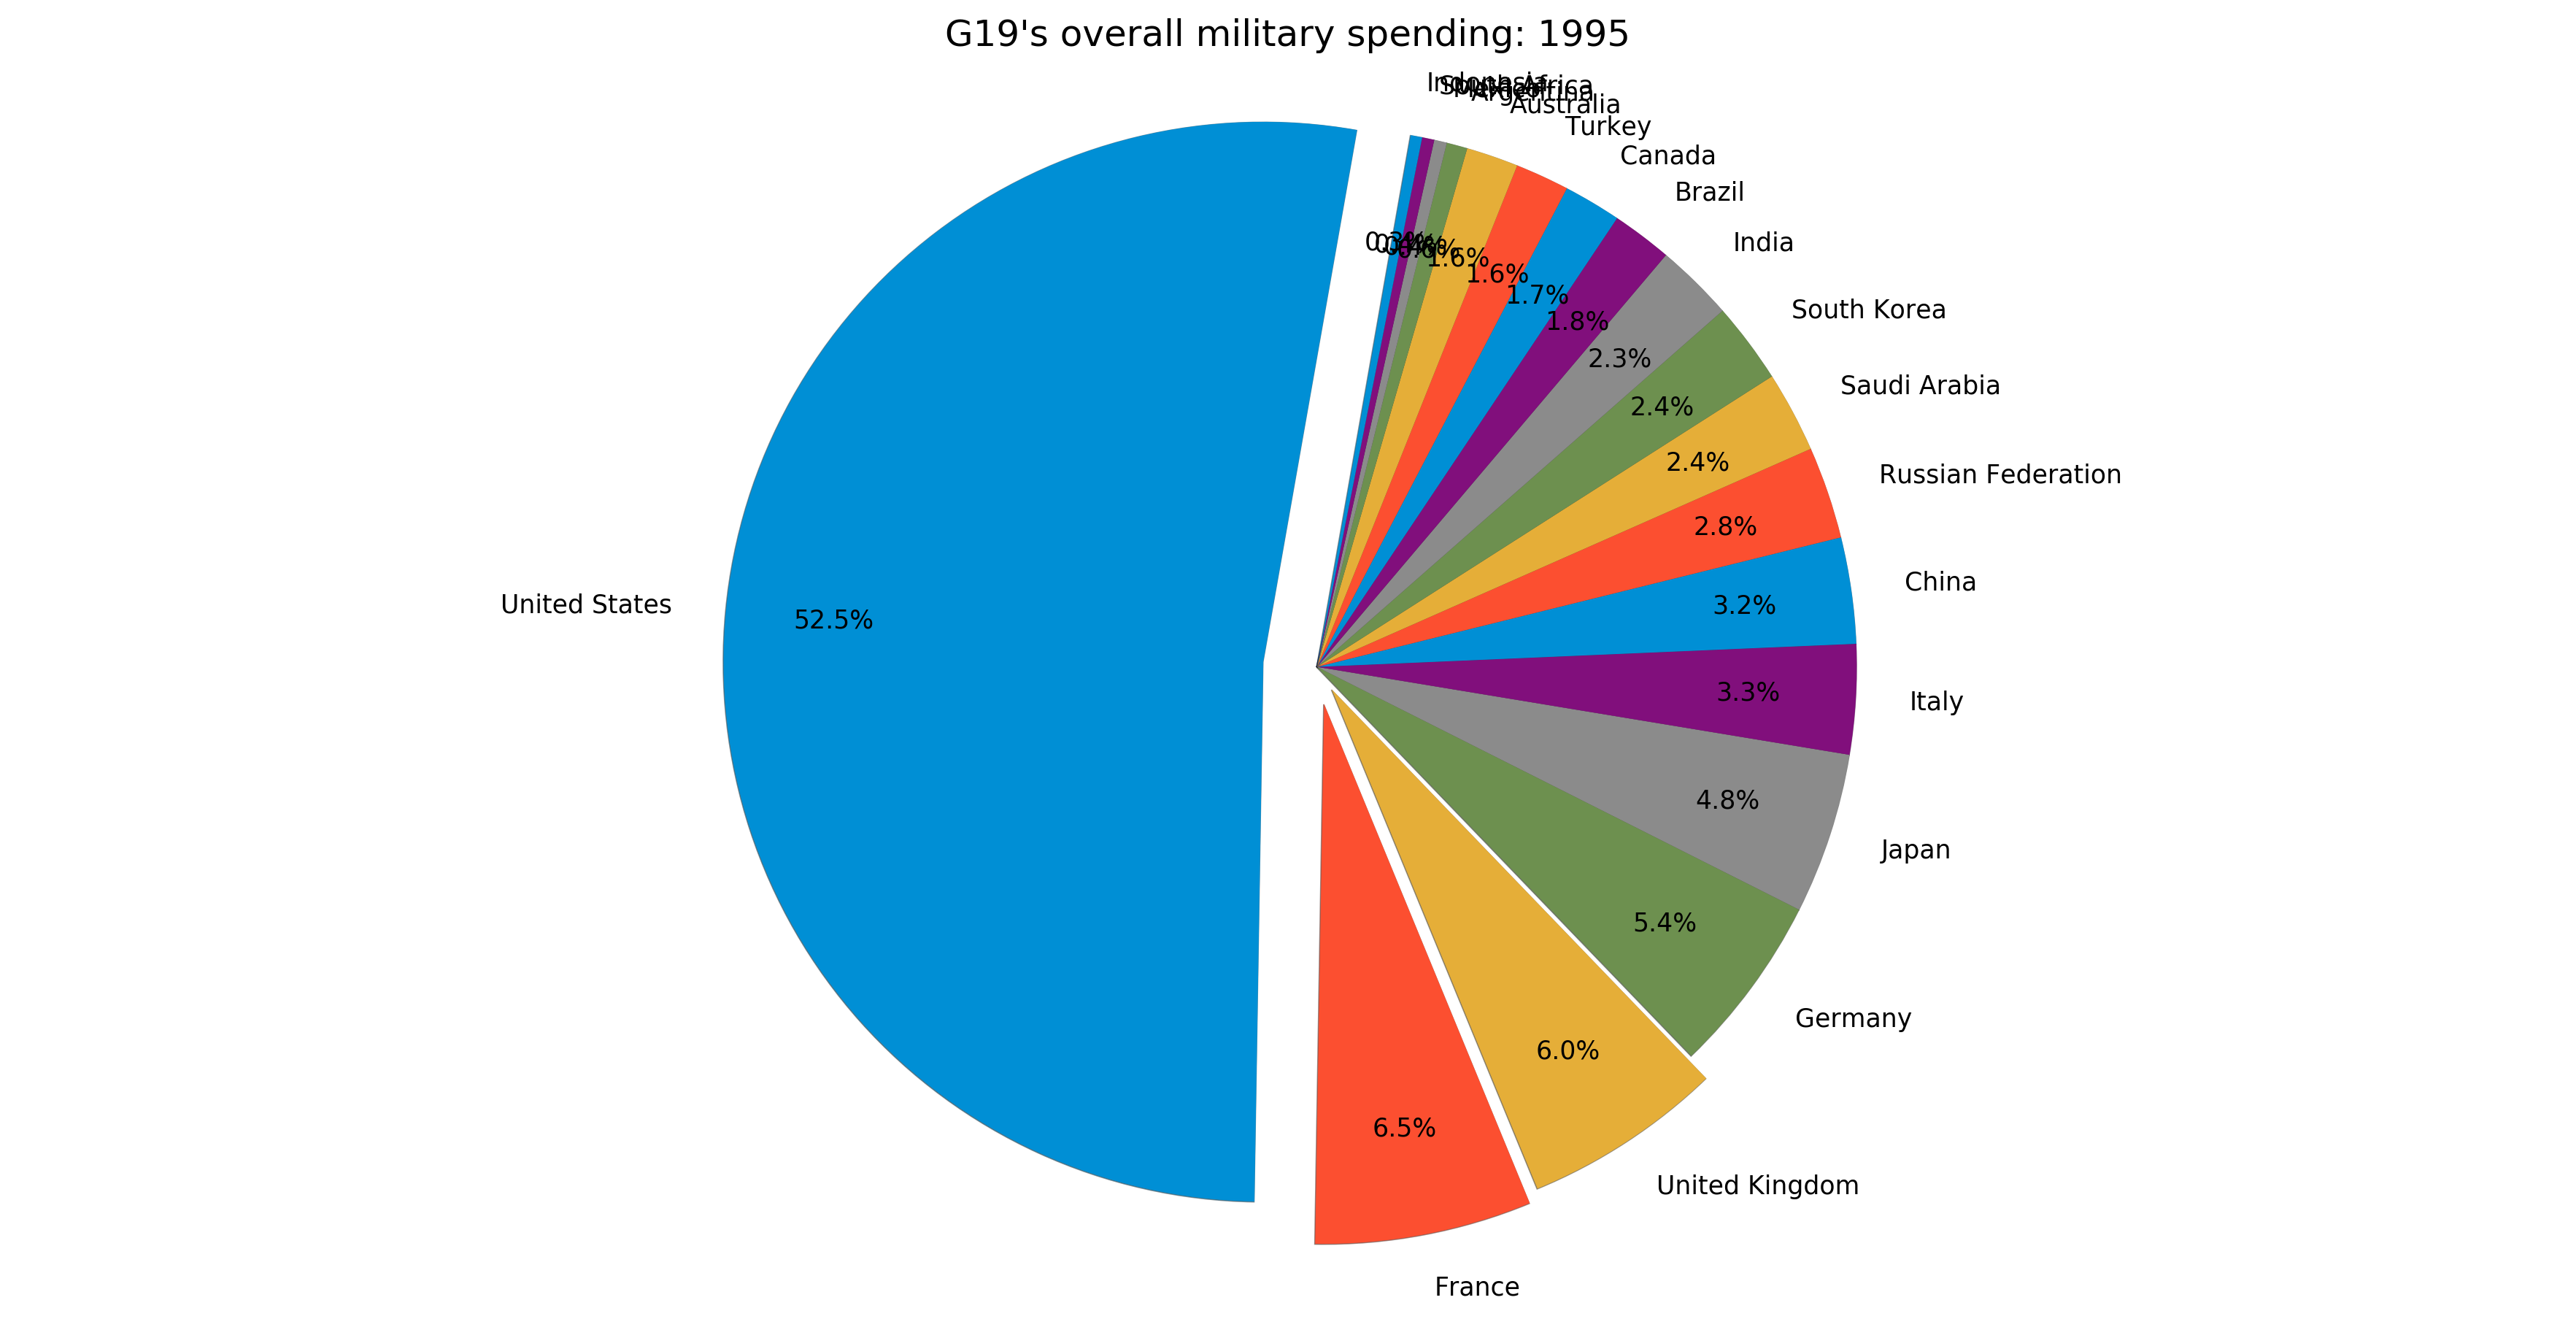

In [76]:
pie_year('1995')

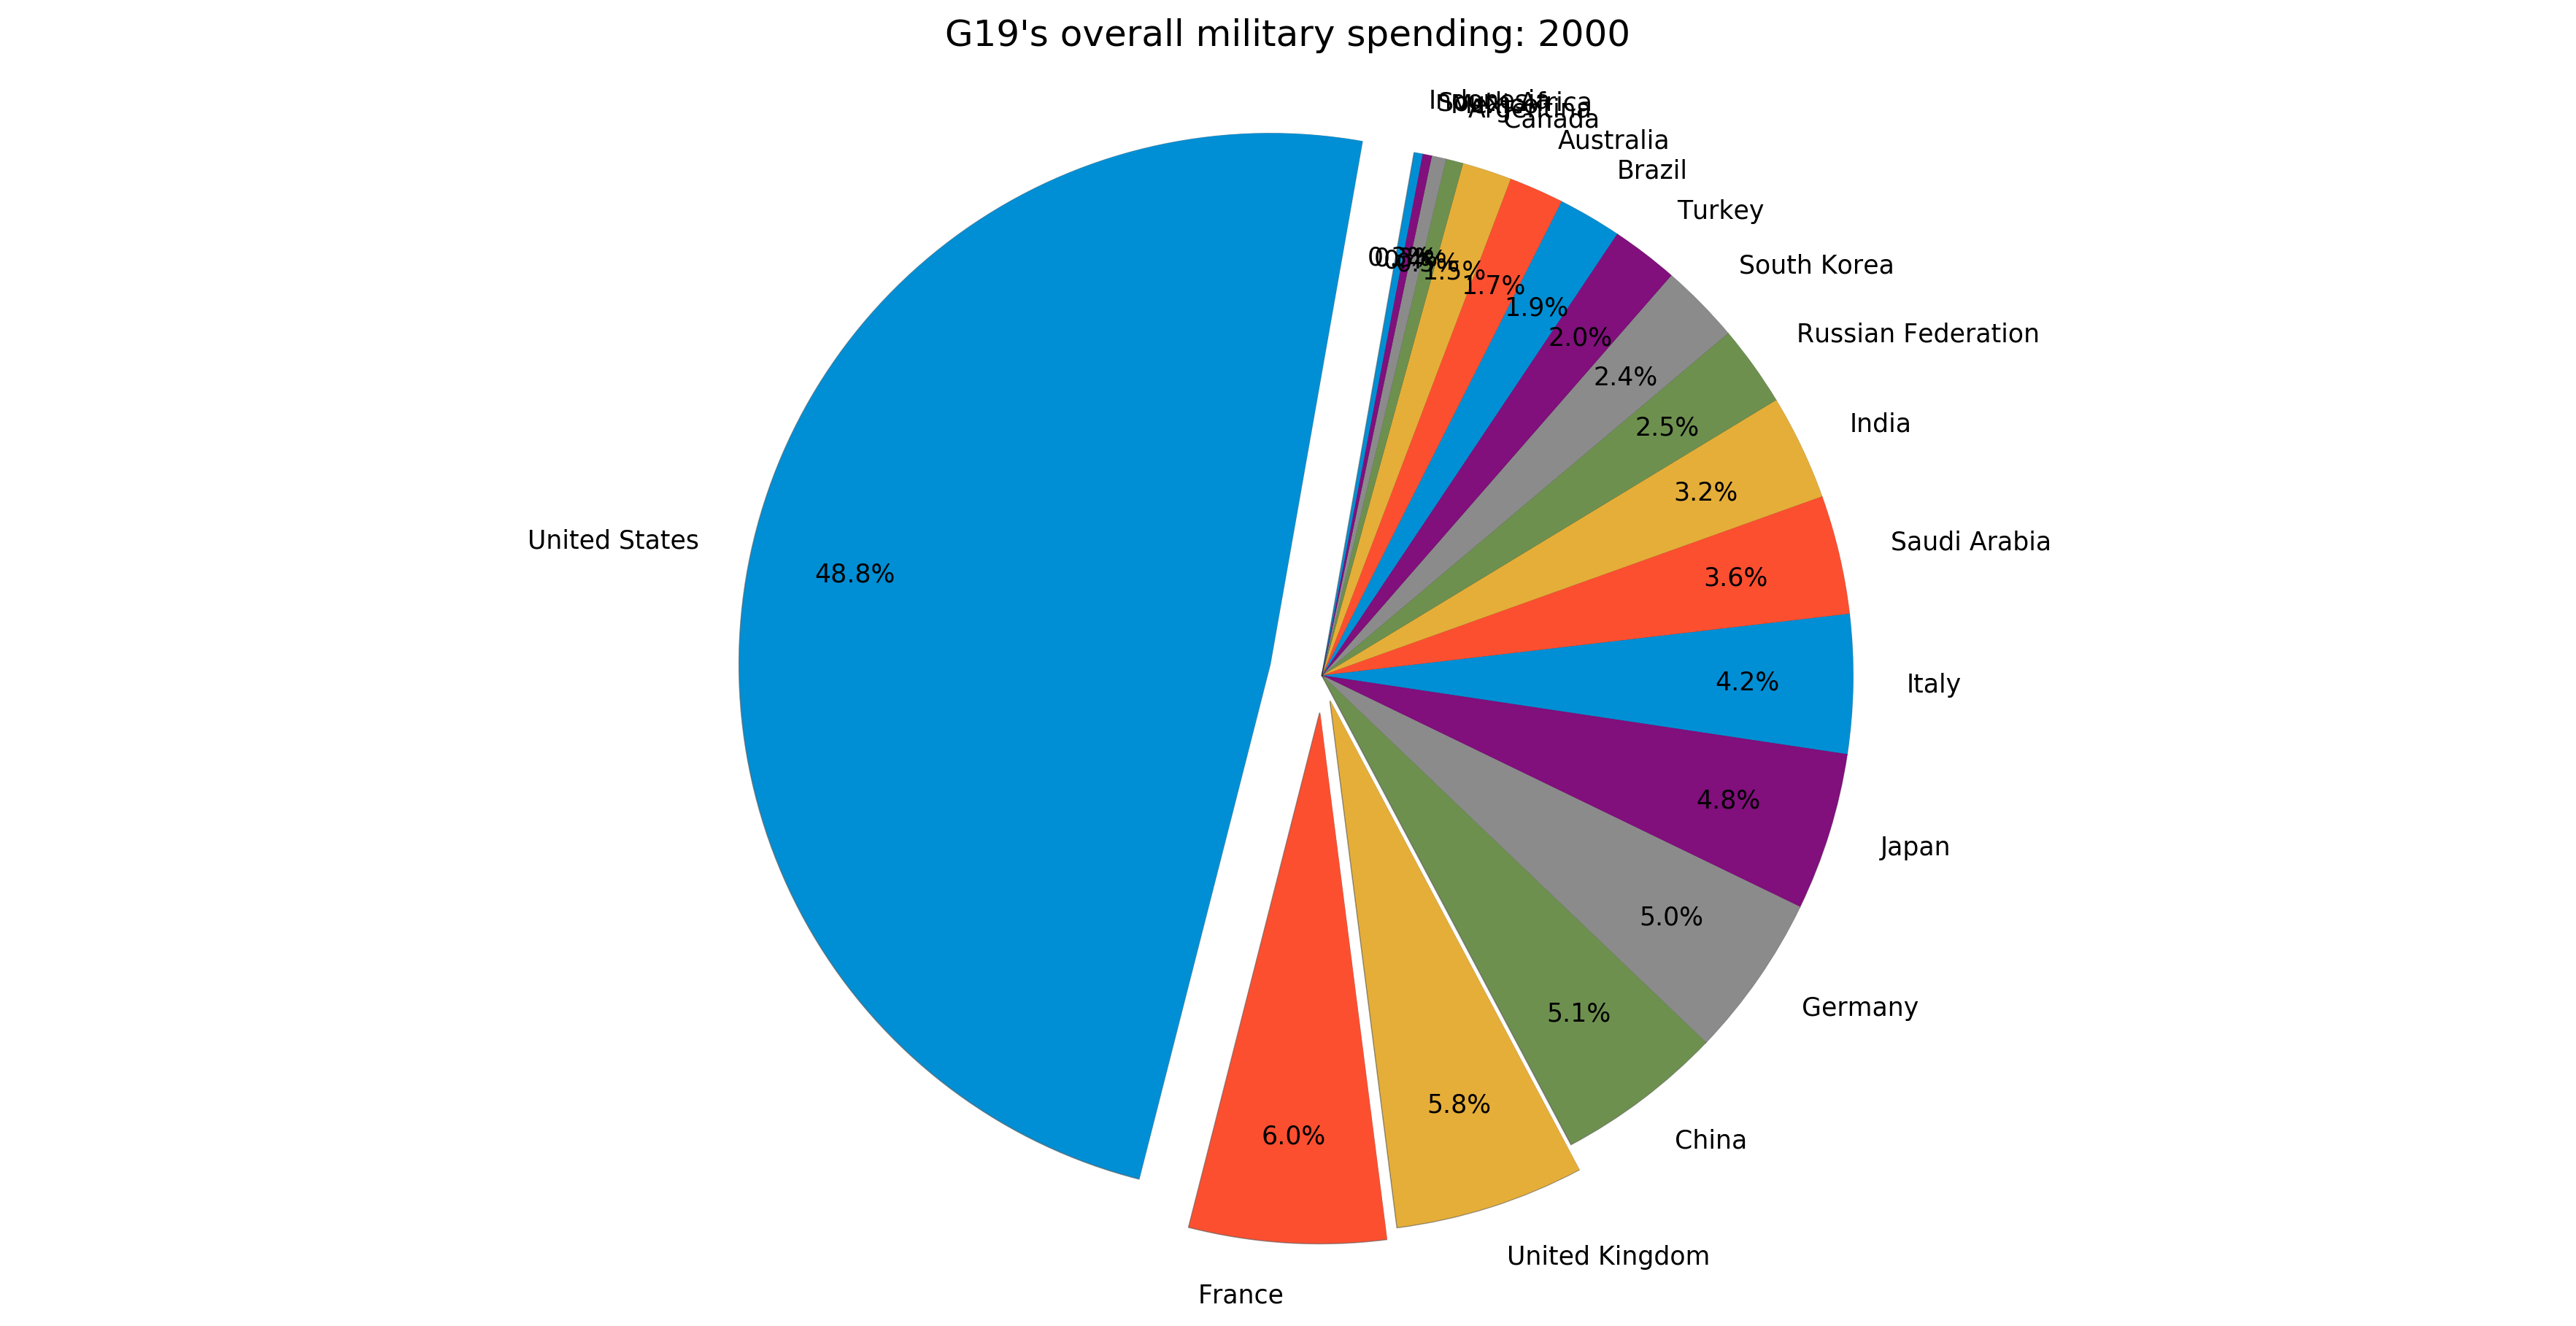

In [77]:
pie_year('2000')

In [78]:
pie_year('2005')

In [79]:
pie_year('2015')

In [80]:
pie_year('2016')

### ii. Definition of standard score per year for each country in terms of military spending percentage over the whole year and proceed to a better comparison (visualization)

I define a function to calculate the z-score of a column in a dataframe then I used the apply method to convert all the row in  dataframe into percentage. 

### standardization function

In [82]:
# This function helps define a per year for each country by standardizing 

def standardize(x):
    ''' This function takes an array as an argument and returns another array of the standardized score of each element
    in this array. 
    '''
    return (x - x.mean()) / x.std()

In [83]:
#standardize the whole military dataframe witht apply method 
ms_standardize = military_spending.apply(standardize)

In [85]:
ms_standardize.head(3)

1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  \
country                                                                      
United States   4.08  4.07  4.07  4.06  4.06  4.07  4.06  4.07  4.08  4.08   
China          -0.18 -0.16 -0.14 -0.11 -0.04 -0.02  0.07  0.11  0.10  0.12   
United Kingdom  0.06  0.08  0.05  0.06  0.05  0.05  0.06  0.05  0.04  0.02   

                ...   2007  2008  2009  2010  2011  2012  2013  2014  2015  \
country         ...                                                          
United States   ...   4.07  4.07  4.05  4.05  4.04  4.01  3.97  3.91  3.87   
China           ...   0.29  0.30  0.39  0.42  0.49  0.61  0.78  0.94  1.05   
United Kingdom  ...  -0.01 -0.02 -0.04 -0.06 -0.08 -0.09 -0.10 -0.12 -0.14   

                2016  
country               
United States   3.86  
China           1.11  
United Kingdom -0.13  

[3 rows x 22 columns]

### Distribution function - visualization

In [86]:
#define a function for the z-score distribution per year 

### Subplot the years 1995 - 2000 - 2005 - 2010 - 2015 and point out any change - 

def distribution_year(year):
    ''' This function takes a year as an argument and returns a distribution of the standardized scores 
    of the military spending for this given year.
    '''
    plt.figure(figsize=(16,9))
    sns.distplot(ms_standardize[year])
    plt.title("Military spending z-scores: "+ year)

In [87]:
distribution_year('1995')

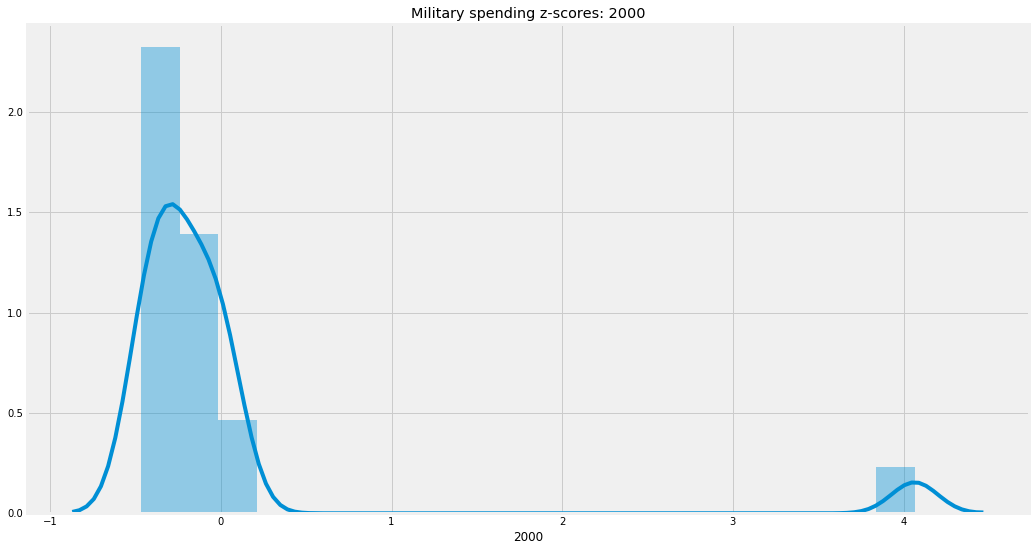

In [88]:
distribution_year('2000')

In [89]:
distribution_year('2005')

In [90]:
distribution_year('2010')

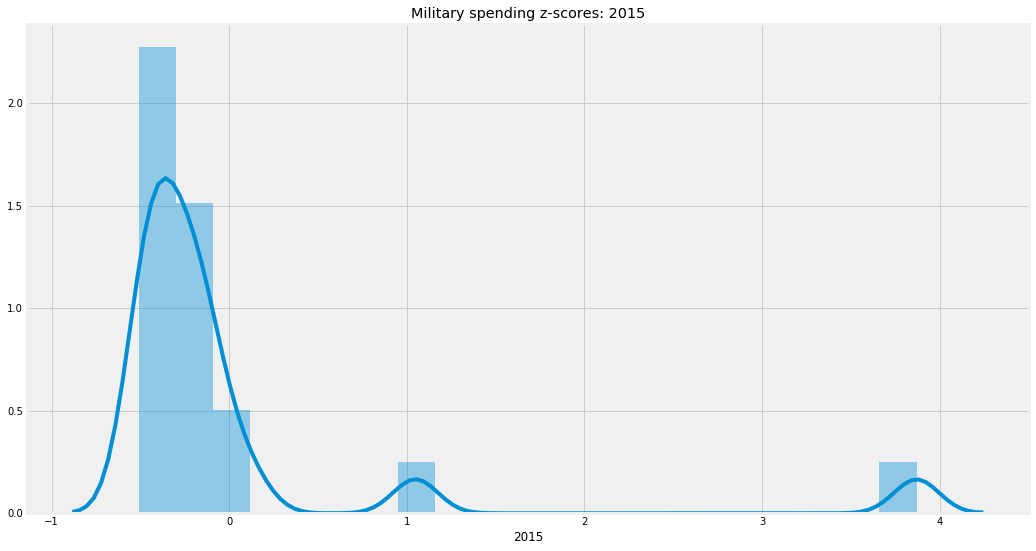

In [91]:
distribution_year('2015')

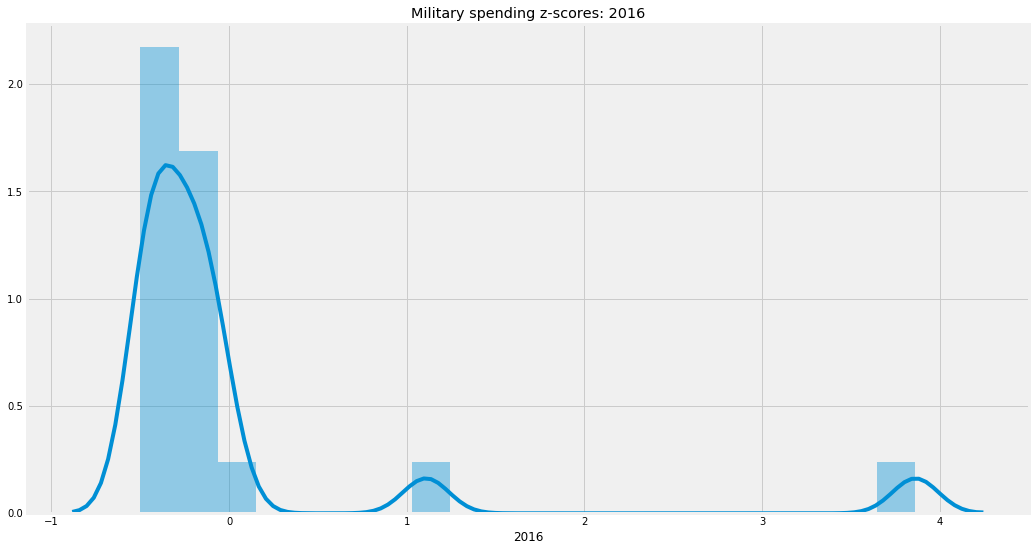

In [92]:
distribution_year('2016')

# Section 5.- Comparison of a country's military spending per capita to that country's GDP per capita

I have adopted the same 2 methods as in section 3 to compare a country's military spending per capita to that country's GDP per capita. In addition, I compare the top five countries' military spending shares of GDP both in total and in percapita 

### i. Defining a weight of military spending per capita on GDP per capita - Military spending share of GDP (percentage)

a. Dataframe of weight and graph the percentage for each country. 

b. Graph the topfive shares over the 2 decades, and compare with the trend in section 3 (GDP and military spending in total)

### ii. Finding the correlation between military spending and GDP

a. Scatter plot between GDP and military spending 

b. Pearson correlation methods 


### i. Dataframe of weights and visualization 

In [93]:
#define a dataframe of weight 

ms_weight_gdp_pc = ((military_spending_per_capita.T) / (gdp_per_capita.T)*100).T

In [94]:
ms_weight_gdp_pc.head(4)

1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  ...   \
country                                                                ...    
Argentina  1.47  1.24  1.14  1.14  1.22  1.15  1.19  1.14  1.08  0.89  ...    
Australia  2.08  2.04  1.82  1.78  2.00  1.76  1.87  2.03  2.14  1.97  ...    
Brazil     1.82  1.65  1.57  1.66  1.64  1.73  1.95  1.89  1.49  1.45  ...    
Canada     1.52  1.37  1.22  1.23  1.22  1.12  1.14  1.12  1.12  1.11  ...    

           2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  
country                                                                
Argentina  0.80  0.77  0.90  0.82  0.76  0.84  0.93  0.95  0.94  0.95  
Australia  2.00  1.76  2.04  2.02  1.90  1.69  1.57  1.75  1.77  2.03  
Brazil     1.45  1.43  1.52  1.53  1.40  1.37  1.32  1.32  1.35  1.31  
Canada     1.19  1.24  1.38  1.19  1.19  1.12  1.00  0.99  0.98  0.99  

[4 rows x 22 columns]

### Linear plot function

In [95]:
#This function graph the military spending per capita share of gdp per capita for a country over the whole period. 

def share_ms_gdp_pc(country):
    ''' This function takes a country name (in string) as an argument and return a plot line 
    of all the military per capita shares of GDP per capita since 1995 
    '''
    fig = plt.figure(figsize=(10,3),dpi=250)
    plt.plot(ms_weight_gdp_pc.columns, ms_weight_gdp_pc.loc[country], '-.', label=country)
    plt.title("Military spending per capita share of GDP per capita: "+country)
    plt.xlabel("year")
    plt.ylabel("percentage")
    plt.legend()

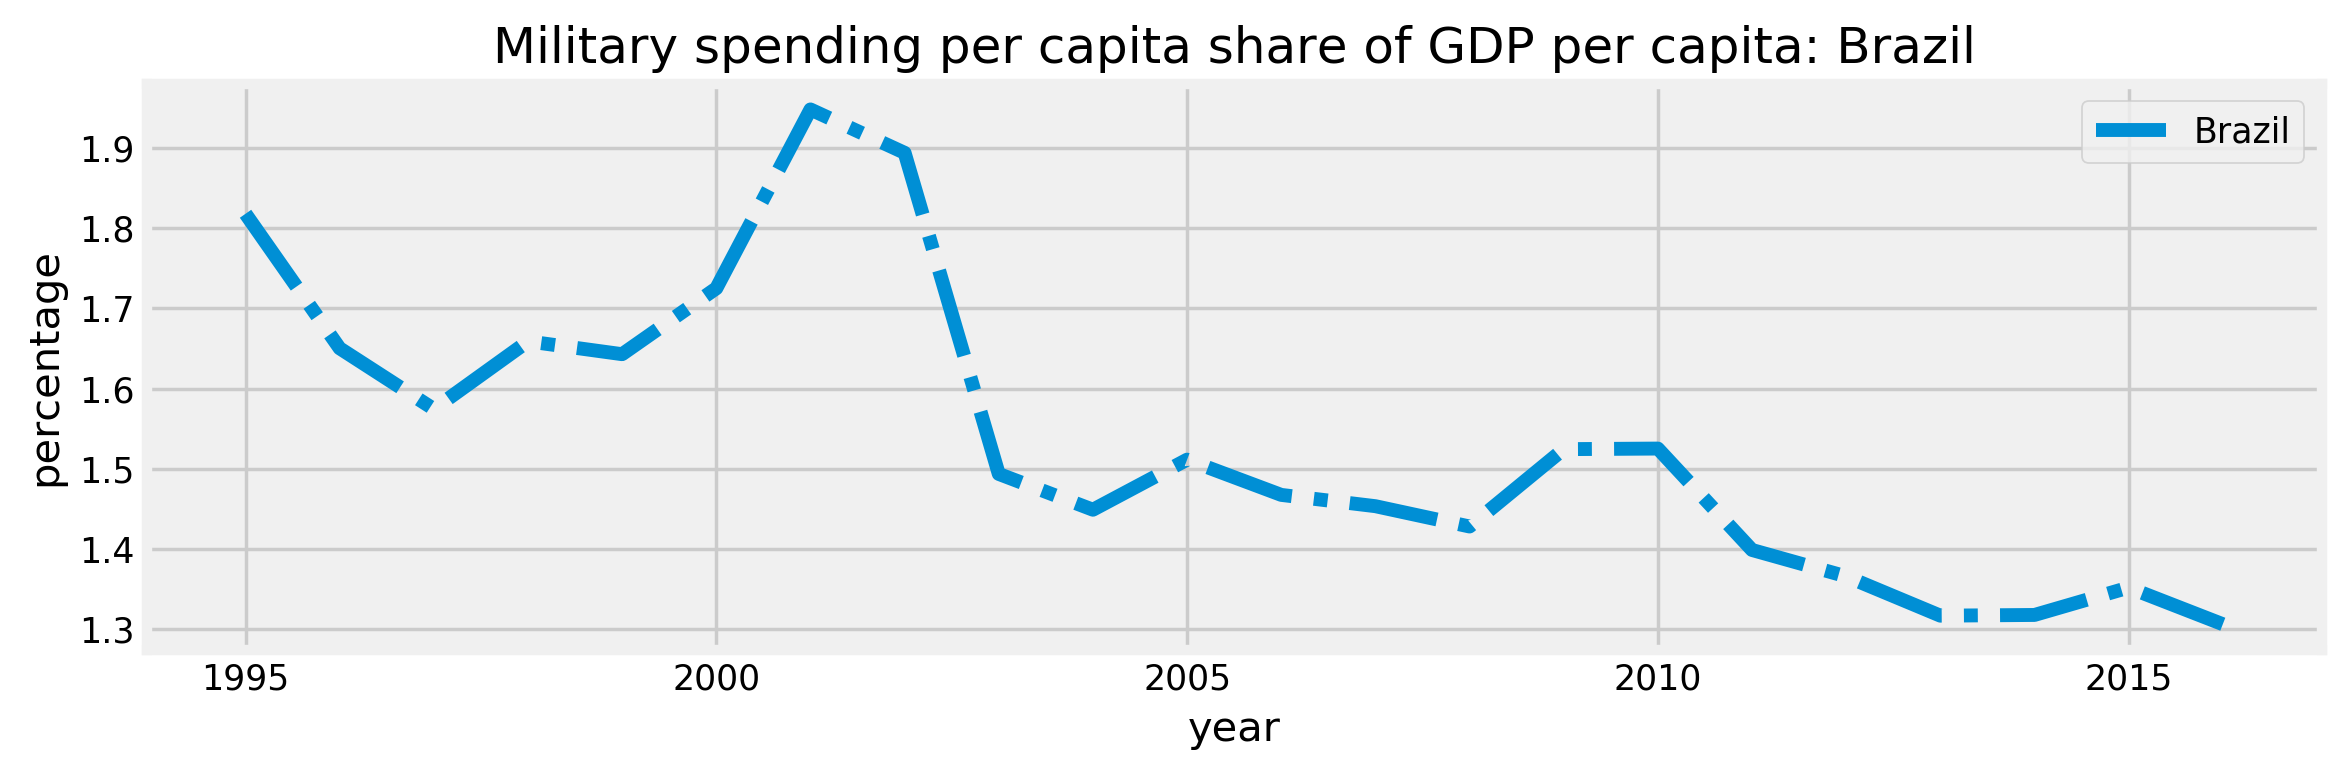

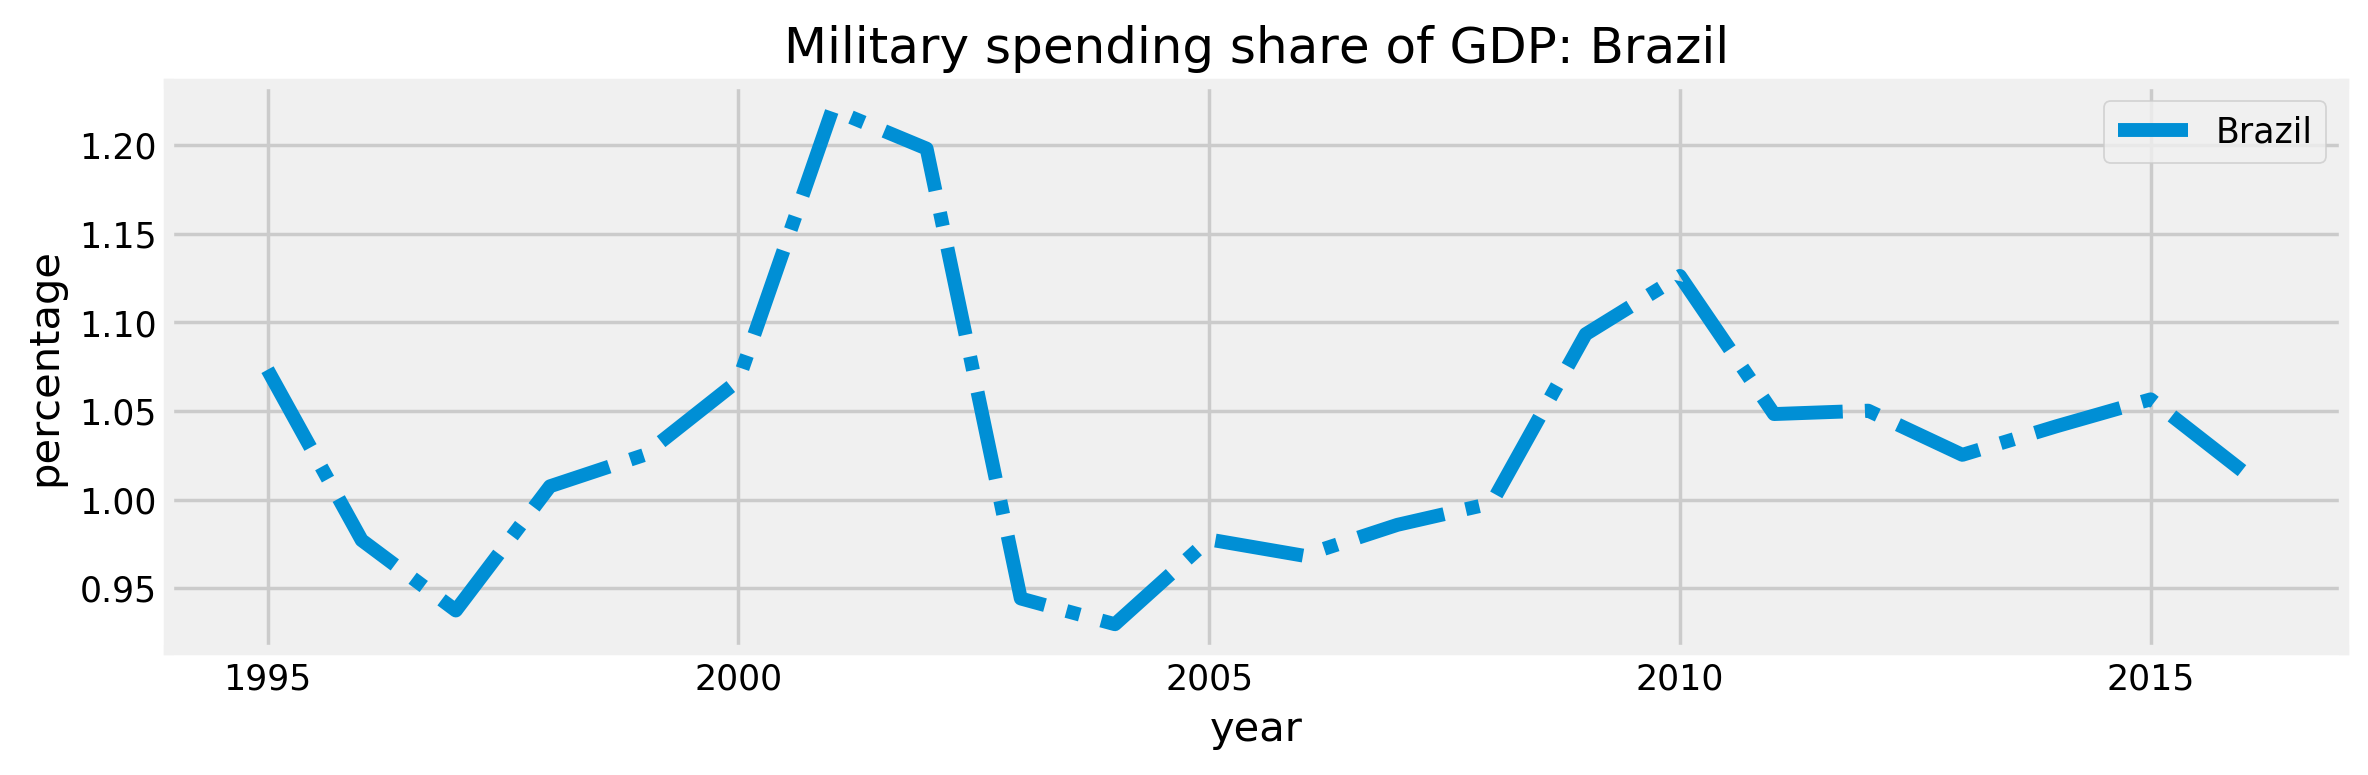

In [98]:
share_ms_gdp_pc('Brazil')
share_ms_gdp("Brazil")
plt.show()

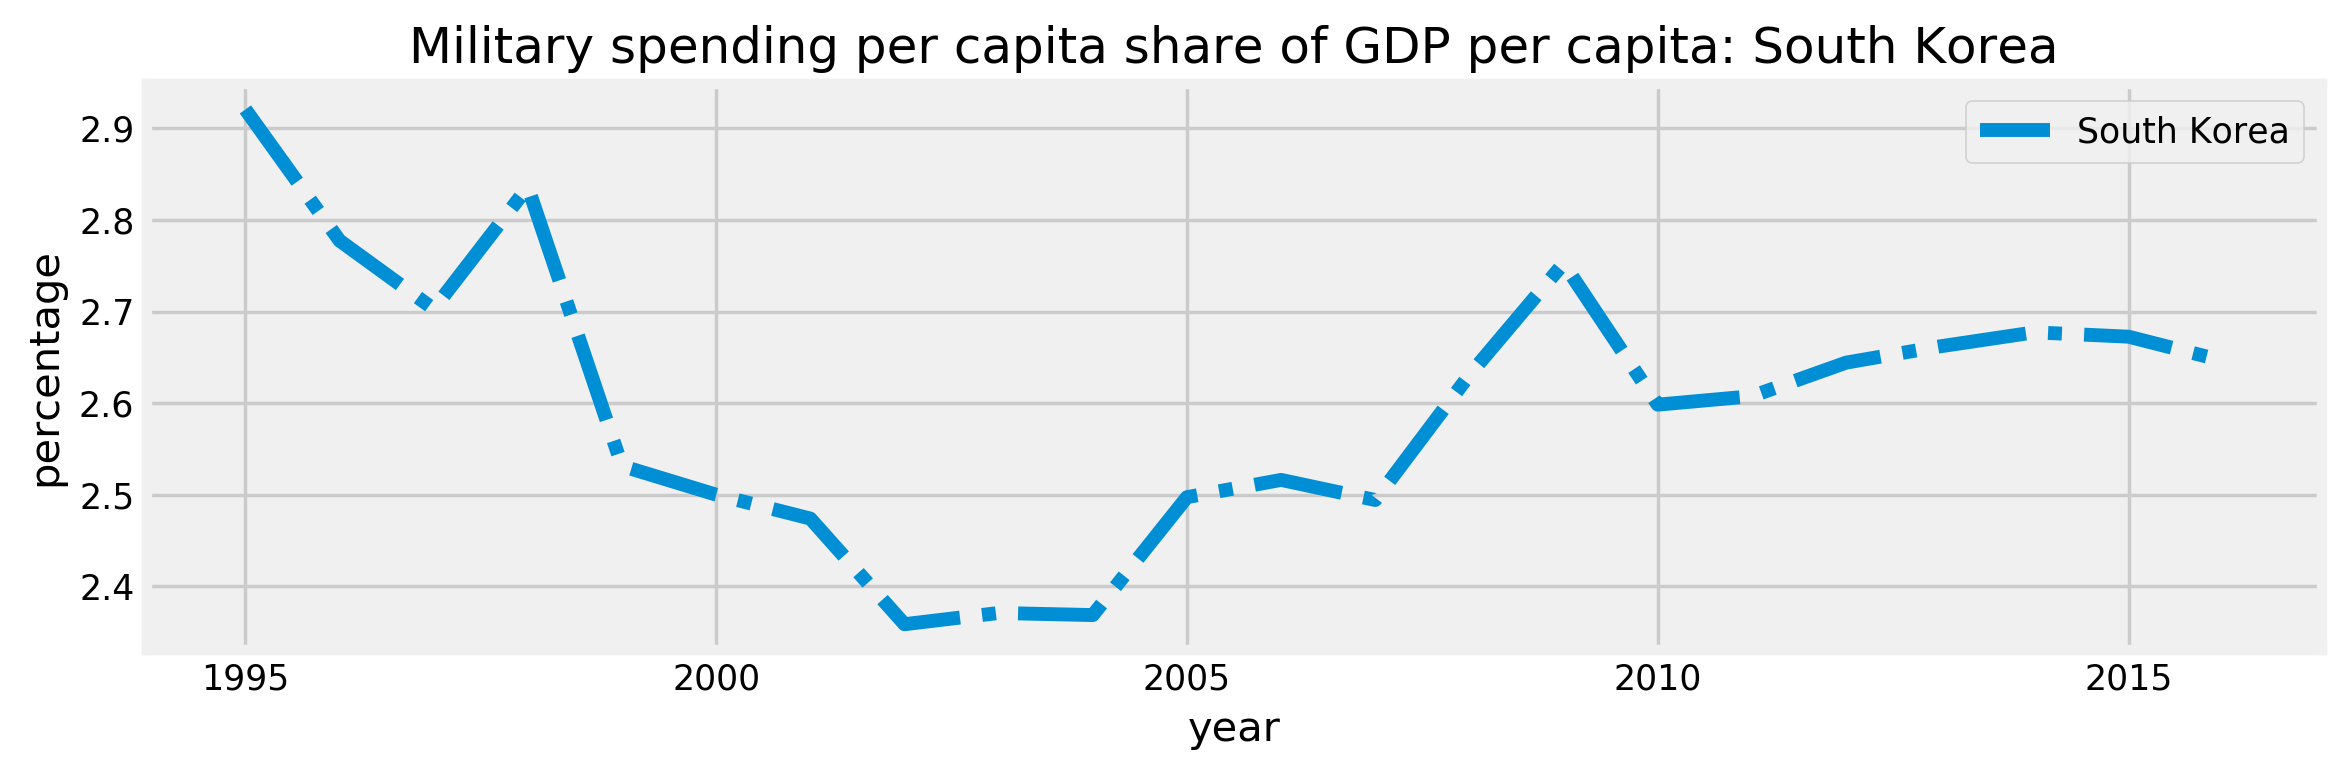

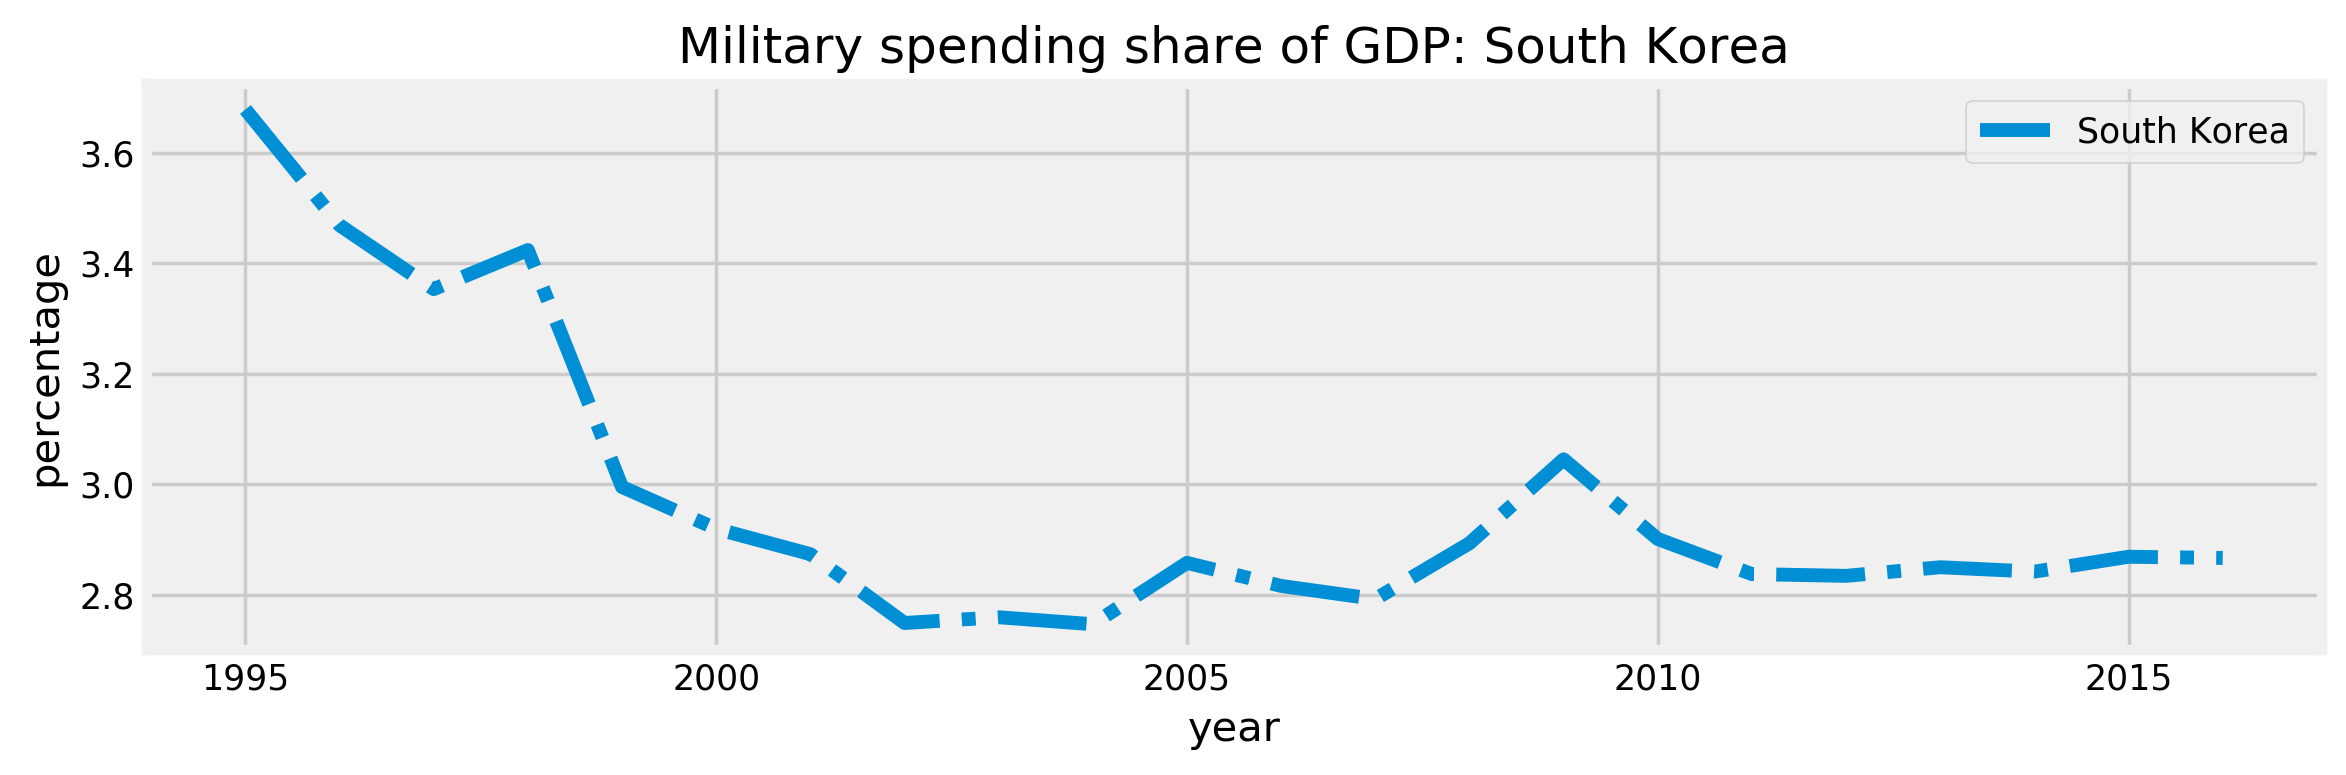

In [99]:
share_ms_gdp_pc('South Korea')
share_ms_gdp("South Korea")

In [100]:
topfive(ms_weight_gdp_pc, 2016)

2016
1        Saudi Arabia
2  Russian Federation
3       United States
4         South Korea
5               India

In [101]:
topfive(ms_weight_gdp_pc, 1995)

1995
1        Saudi Arabia
2              Turkey
3       United States
4  Russian Federation
5              France

In [102]:
topfives(ms_weight_gdp_pc, 1995, 2016)

1995                1996                1997  \
1        Saudi Arabia        Saudi Arabia        Saudi Arabia   
2              Turkey              Turkey  Russian Federation   
3       United States  Russian Federation              Turkey   
4  Russian Federation       United States       United States   
5              France              France              France   

                 1998                1999                2000  \
1        Saudi Arabia        Saudi Arabia        Saudi Arabia   
2              Turkey              Turkey              Turkey   
3       United States  Russian Federation  Russian Federation   
4  Russian Federation               India               India   
5               India       United States       United States   

                 2001                2002                2003  \
1        Saudi Arabia        Saudi Arabia        Saudi Arabia   
2  Russian Federation  Russian Federation  Russian Federation   
3              Turkey              Turkey       United States   
4               India       United States              Turkey   
5       United States               India               India   

                 2004         ...                        2007  \
1        Saudi Arabia         ...                Saudi Arabia   
2       United States         ...               United States   
3  Russian Federation         ...          Russian Federation   
4               India         ...                 South Korea   
5              Turkey         ...                       India   

                 2008                2009                2010  \
1        Saudi Arabia        Saudi Arabia        Saudi Arabia   
2       United States       United States       United States   
3  Russian Federation  Russian Federation  Russian Federation   
4               India               India               India   
5         South Korea         South Korea         South Korea   

                 2011                2012                2013  \
1        Saudi Arabia        Saudi Arabia        Saudi Arabia   
2       United States       United States  Russian Federation   
3  Russian Federation  Russian Federation       United States   
4               India         South Korea         South Korea   
5         South Korea               India               India   

                 2014                2015                2016  
1        Saudi Arabia        Saudi Arabia        Saudi Arabia  
2  Russian Federation  Russian Federation  Russian Federation  
3       United States       United States       United States  
4         South Korea         South Korea         South Korea  
5               India               India               India  

[5 rows x 22 columns]

In [111]:
top_weight2 = topfives(ms_weight_gdp_pc, 1995, 2016).unstack().value_counts().index[:6]

In [112]:
top_weight2

Index(['United States', 'Saudi Arabia', 'Russian Federation', 'India',
       'South Korea', 'Turkey'],
      dtype='object')

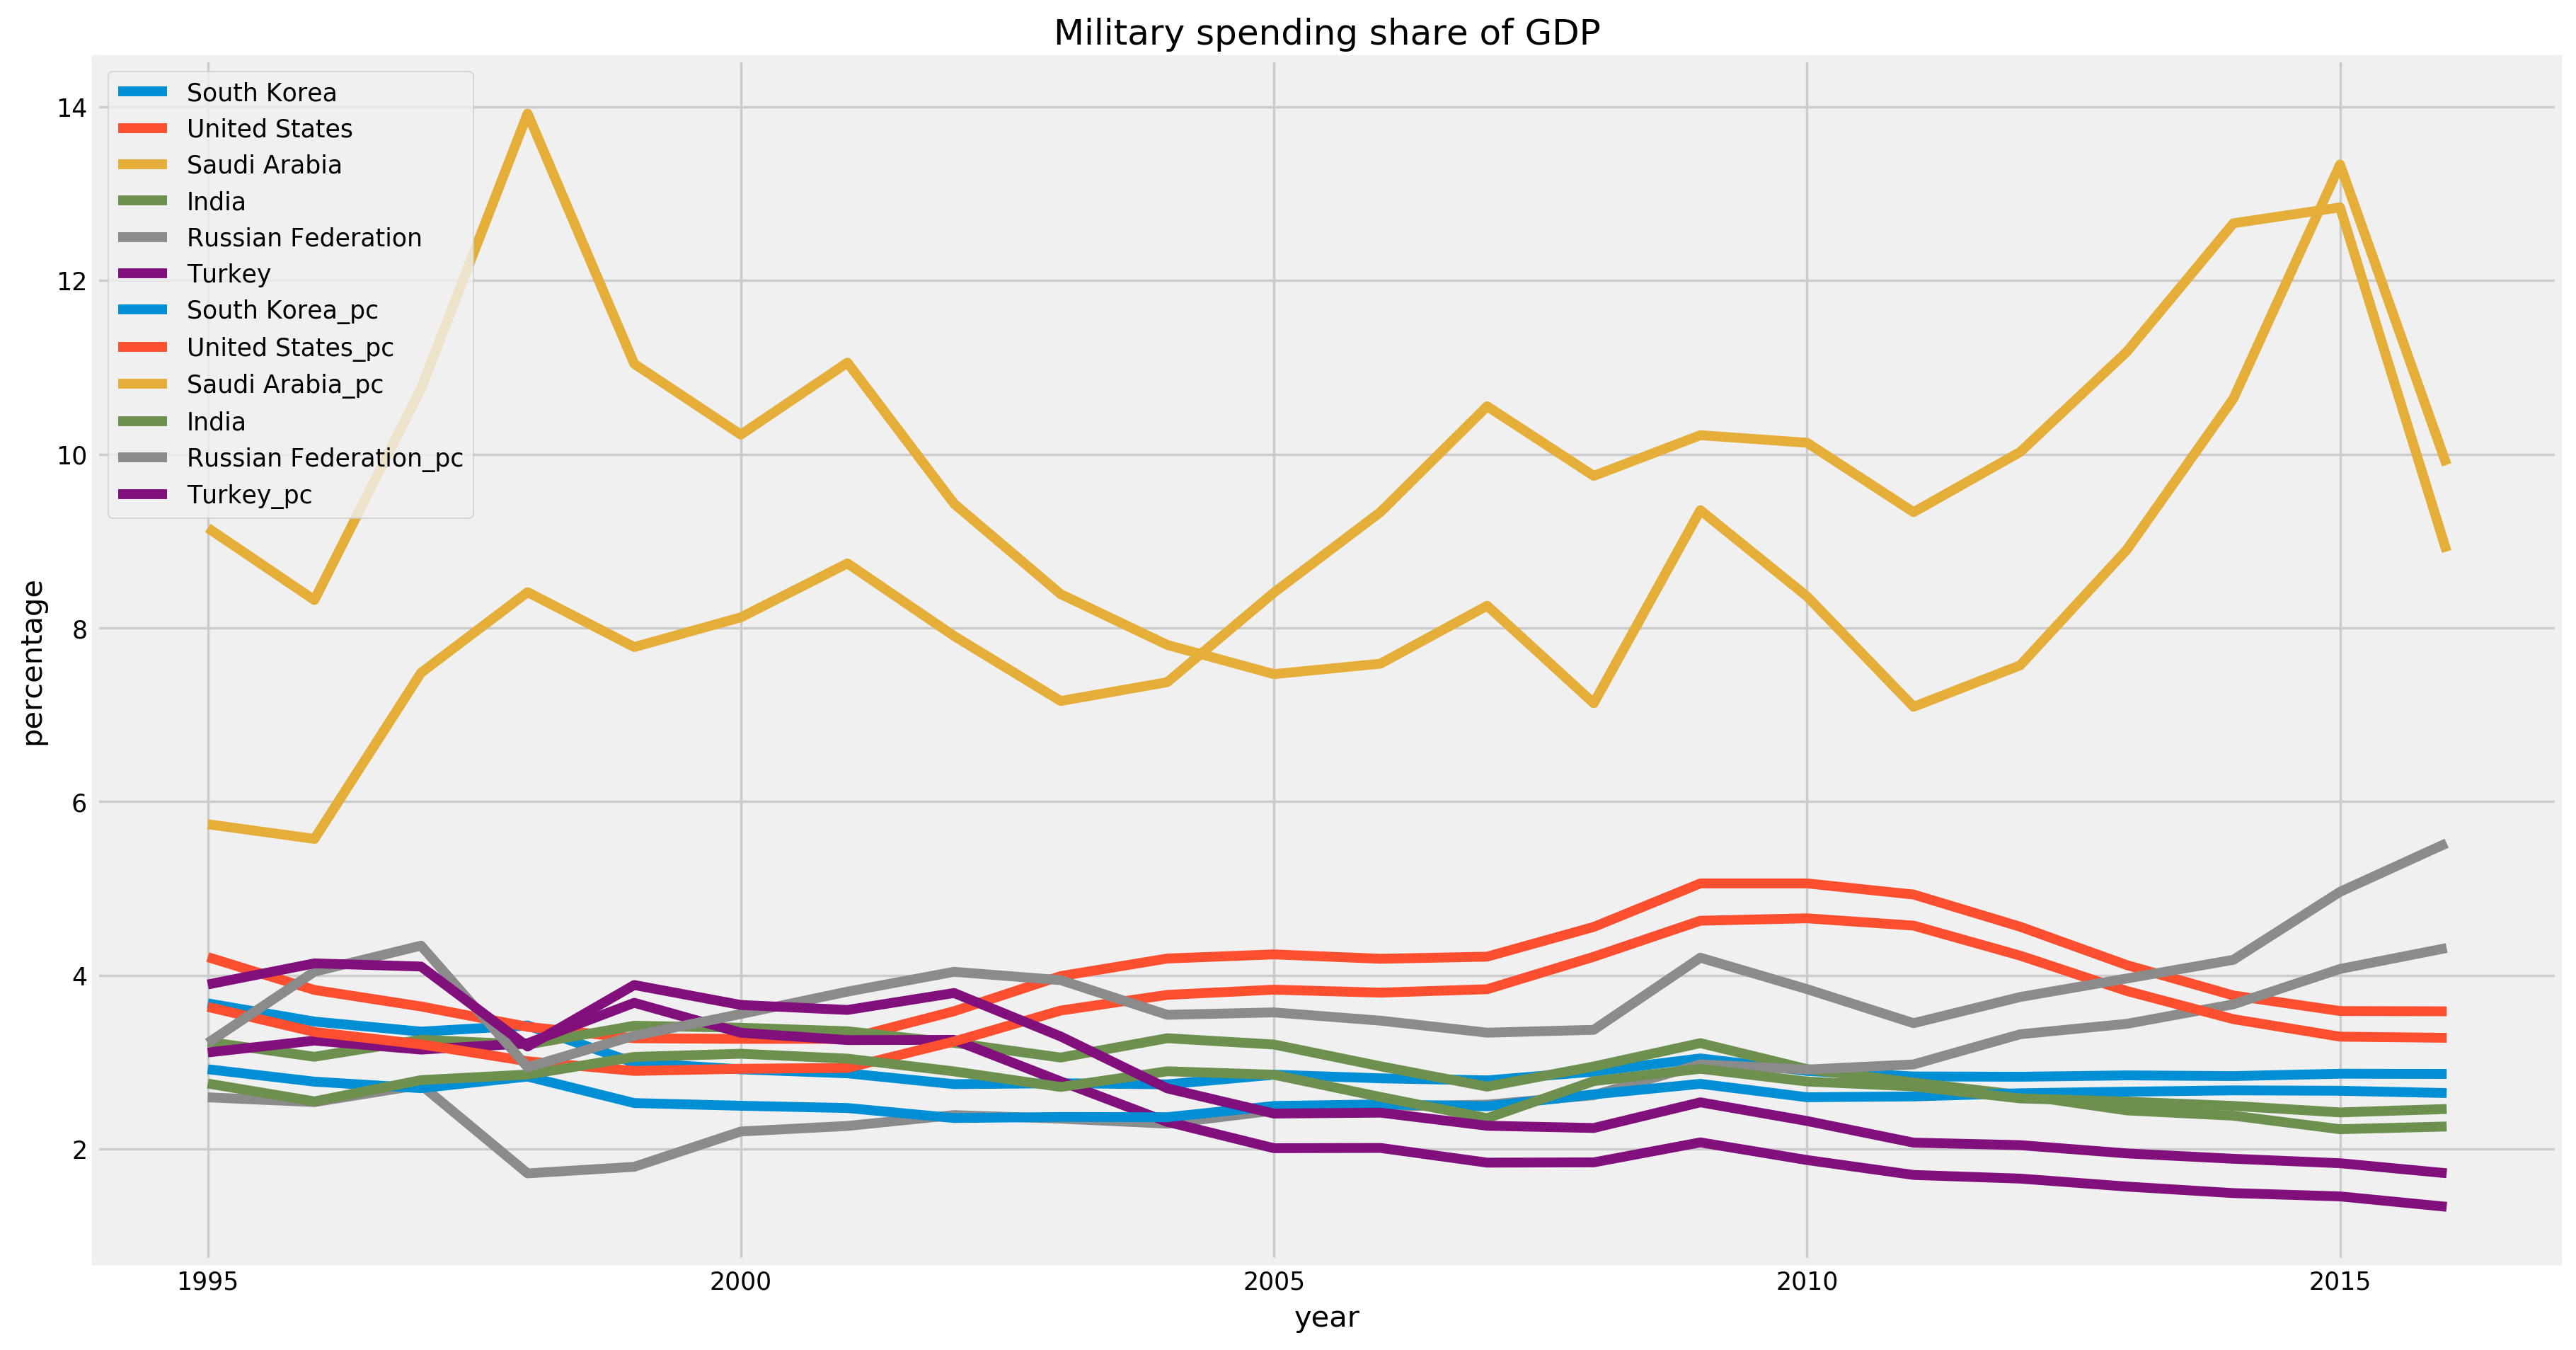

In [115]:
fig = plt.figure(figsize=(16,9),dpi=250)
#for country in top_weight (total):
plt.plot(ms_weight_gdp.columns, ms_weight_gdp.loc['South Korea'], '-', label='South Korea')
plt.plot(ms_weight_gdp.columns, ms_weight_gdp.loc['United States'], '-', label='United States')
plt.plot(ms_weight_gdp.columns, ms_weight_gdp.loc['Saudi Arabia'], '-', label ='Saudi Arabia')
plt.plot(ms_weight_gdp.columns, ms_weight_gdp.loc['India'], '-', label='India')
plt.plot(ms_weight_gdp.columns, ms_weight_gdp.loc['Russian Federation'], '-', label='Russian Federation')
plt.plot(ms_weight_gdp.columns, ms_weight_gdp.loc['Turkey'], '-', label ='Turkey')
#for country in top_weight (per capita):
plt.plot(ms_weight_gdp_pc.columns, ms_weight_gdp_pc.loc['South Korea'], '-', label='South Korea_pc')
plt.plot(ms_weight_gdp_pc.columns, ms_weight_gdp_pc.loc['United States'], '-', label='United States_pc')
plt.plot(ms_weight_gdp_pc.columns, ms_weight_gdp_pc.loc['Saudi Arabia'], '-', label ='Saudi Arabia_pc')
plt.plot(ms_weight_gdp_pc.columns, ms_weight_gdp_pc.loc['India'], '-', label='India')
plt.plot(ms_weight_gdp_pc.columns, ms_weight_gdp_pc.loc['Russian Federation'], '-', label='Russian Federation_pc')
plt.plot(ms_weight_gdp_pc.columns, ms_weight_gdp_pc.loc['Turkey'], '-', label ='Turkey_pc')
plt.title("Military spending share of GDP")
plt.xlabel("year")
plt.ylabel("percentage")
plt.legend()


### Correlation - visualization and coefficient 

I used all the previous functions defined in section 3.

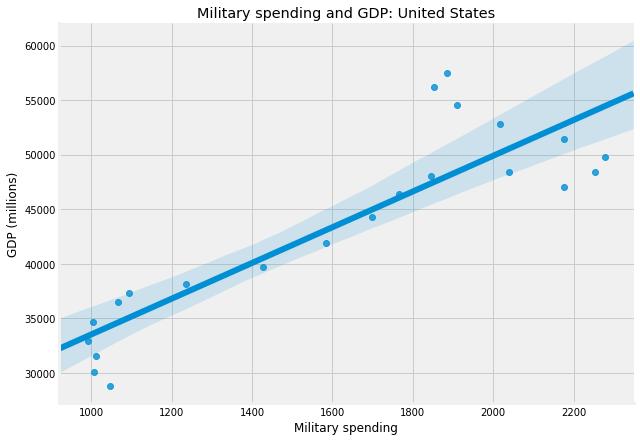

In [116]:
scatter_country(military_spending_per_capita, gdp_per_capita, "United States")

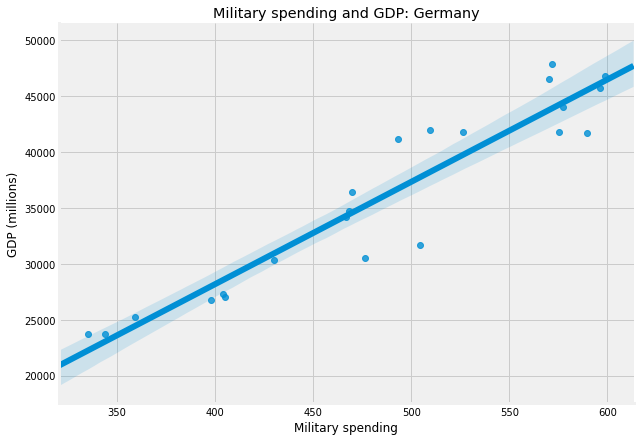

In [117]:
scatter_country(military_spending_per_capita, gdp_per_capita, "Germany")

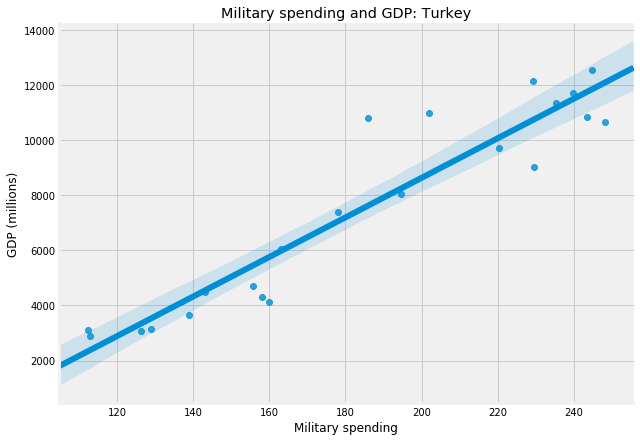

In [118]:
scatter_country(military_spending_per_capita, gdp_per_capita, "Turkey")

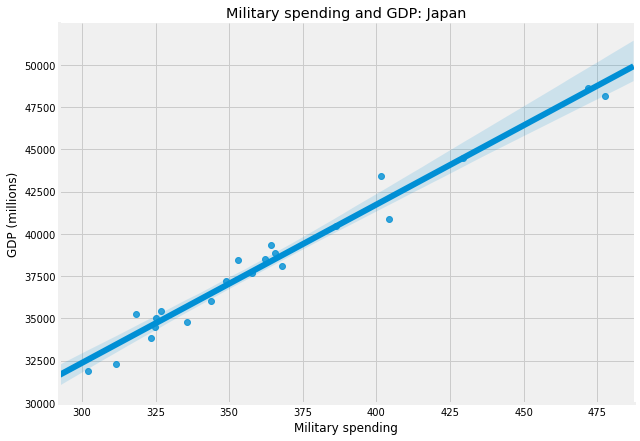

In [119]:
scatter_country(military_spending_per_capita, gdp_per_capita, "Japan")

In [120]:
#correlation 
corr_country(military_spending_per_capita, gdp_per_capita, 'Canada')

0.94519827259524547

In [121]:
corr_country(military_spending_per_capita, gdp_per_capita, 'Germany')

0.94545847181901355

In [122]:
corr_country(military_spending_per_capita, gdp_per_capita, 'Turkey')

0.94209312573026893

In [123]:
corr_total(military_spending_per_capita, gdp_per_capita)

Coefficient
China                      1.00
South Korea                0.99
India                      0.99
Brazil                     0.99
Japan                      0.99
Australia                  0.98
Russian Federation         0.97
France                     0.96
Germany                    0.95
Canada                     0.95
Turkey                     0.94
Italy                      0.94
United Kingdom             0.94
Indonesia                  0.93
Mexico                     0.90
United States              0.88
Saudi Arabia               0.88
Argentina                  0.88
South Africa               0.87

### Dataframe for the 2 coeeficients (total / per capita)

In [124]:
df_coeff = pd.concat([corr_total(gdp_constant, military_spending), 
                    corr_total(military_spending_per_capita, gdp_per_capita)], keys=['total', 'per capita'])

In [125]:
df_coeff = df_coeff.unstack()

In [126]:
df_coeff

Coefficient                                                     \
             Argentina Australia Brazil Canada China France Germany India   
total             0.70      0.98   0.95   0.70   1.0   0.52   -0.70  0.96   
per capita        0.88      0.98   0.99   0.95   1.0   0.96    0.95  0.99   

                                                                         \
           Indonesia Italy Japan Mexico Russian Federation Saudi Arabia   
total           0.93  0.47  0.27   0.92               0.92         0.95   
per capita      0.93  0.94  0.99   0.90               0.97         0.88   

                                                                         
           South Africa South Korea Turkey United Kingdom United States  
total              0.85        0.98  -0.18           0.67          0.80  
per capita         0.87        0.99   0.94           0.94          0.88

# Section 6.- Single out the fastest growing countries in military spending in fixed value and in percentage 

Based on the work and results from the previous sections, I simply created a stacked plot to see the trends for the fastest growing countriees in military spending in fixed value and in percentage. 

### Selection of the top five in military spending 
The top five function has been already defined.

#### Military spending - fixed 

In [127]:
topfives(military_spending, 1995,2016)

1995            1996            1997            1998  \
1   United States   United States   United States   United States   
2          France          France          France          France   
3  United Kingdom  United Kingdom  United Kingdom  United Kingdom   
4         Germany         Germany         Germany         Germany   
5           Japan           Japan           Japan           Japan   

             1999            2000            2001            2002  \
1   United States   United States   United States   United States   
2          France          France           China           China   
3  United Kingdom  United Kingdom  United Kingdom  United Kingdom   
4         Germany           China          France          France   
5           Japan         Germany           Japan           Japan   

             2003            2004         ...                    2007  \
1   United States   United States         ...           United States   
2           China           China         ...                   China   
3  United Kingdom  United Kingdom         ...          United Kingdom   
4          France          France         ...                  France   
5           Japan           Japan         ...            Saudi Arabia   

             2008            2009            2010            2011  \
1   United States   United States   United States   United States   
2           China           China           China           China   
3  United Kingdom  United Kingdom  United Kingdom  United Kingdom   
4          France          France          France    Saudi Arabia   
5    Saudi Arabia    Saudi Arabia    Saudi Arabia          France   

                 2012                2013                2014  \
1       United States       United States       United States   
2               China               China               China   
3        Saudi Arabia        Saudi Arabia        Saudi Arabia   
4      United Kingdom  Russian Federation  Russian Federation   
5  Russian Federation      United Kingdom      United Kingdom   

                 2015                2016  
1       United States       United States  
2               China               China  
3        Saudi Arabia  Russian Federation  
4  Russian Federation        Saudi Arabia  
5              France              France  

[5 rows x 22 columns]

In [128]:
topfives(military_spending, 1995,2016).unstack().value_counts()

United States         22
United Kingdom        20
France                19
China                 17
Saudi Arabia          11
Japan                 10
Germany                6
Russian Federation     5
dtype: int64

In [129]:
top_military_fixed = topfives(military_spending, 1995,2016).unstack().value_counts().index[:6]

In [130]:
top_military_fixed

Index(['United States', 'United Kingdom', 'France', 'China', 'Saudi Arabia',
       'Japan'],
      dtype='object')

In [131]:
top_fixed = military_spending.loc[top_military_fixed]

In [132]:
top_fixed

1995    1996    1997    1998    1999    2000    2001  \
United States   433733  410141  408020  398803  399787  415259  418631   
United Kingdom   49369   49074   47528   47792   47733   48981   50964   
France           53557   52272   52451   51085   51517   50923   50768   
China            26232   27857   29879   32739   39829   43261   52216   
Saudi Arabia     20035   20002   27164   31375   27929   30782   32784   
Japan            39793   40519   40857   40903   40685   40888   41604   

                  2002    2003    2004   ...      2007    2008    2009  \
United States   470042  534984  583090   ...    636674  683776  738621   
United Kingdom   54265   58167   58846   ...     61610   64360   65610   
France           51815   53372   54833   ...     54164   53622   57240   
China            60685   65543   72467   ...    103670  113542  137512   
Saudi Arabia     28781   28993   32232   ...     50962   50018   51398   
Japan            41811   41864   41697   ...     40557   40167   40919   

                  2010    2011    2012    2013    2014    2015    2016  
United States   758890  749533  706918  650851  610636  596010  606233  
United Kingdom   64230   61518   58896   56408   54938   53862   54217  
France           54623   53288   52551   52419   53195   55342   55681  
China           144499  156009  169382  185152  200915  214093  225713  
Saudi Arabia     53494   54222   61352   70313   82527   87186   61358  
Japan            41063   41616   41114   40940   41159   41103   41569  

[6 rows x 22 columns]

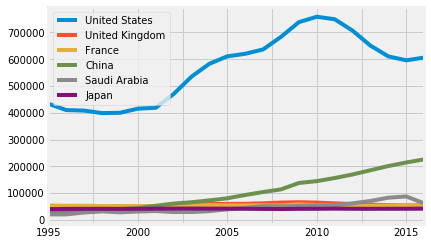

In [133]:
top_fixed.T.plot() 

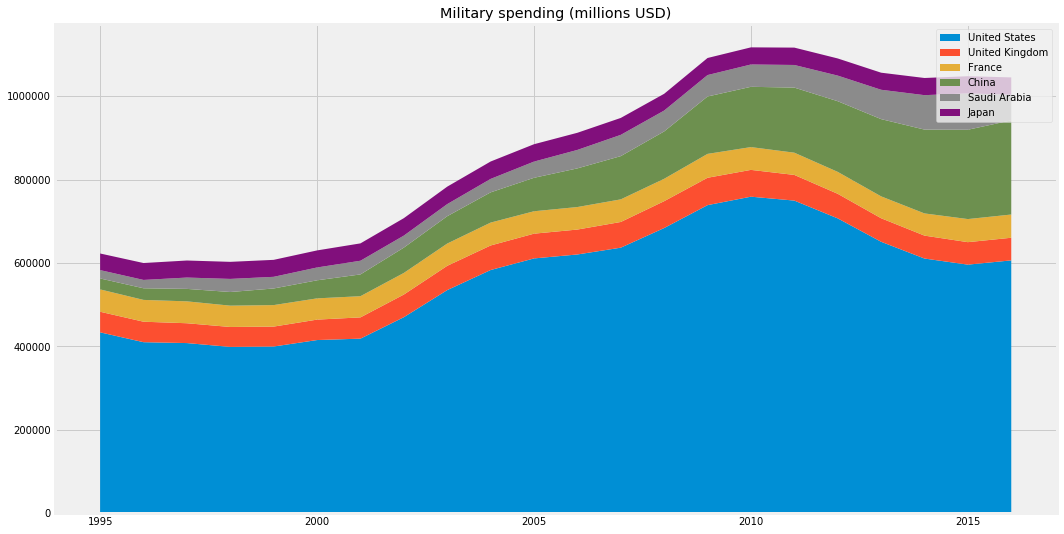

In [134]:
fig = plt.figure(figsize=(16,9))

years = np.array([x for x in range(1995,2016+1)])

plt.stackplot(years, military_spending.loc[top_military_fixed])
plt.legend(top_military_fixed)
#plt.axis('year')
plt.title('Military spending (millions USD)')

#### Military spending percentage

In [135]:
topfives(ms_percent, 1995,2016)

1995            1996            1997            1998  \
1   United States   United States   United States   United States   
2          France          France          France          France   
3  United Kingdom  United Kingdom  United Kingdom  United Kingdom   
4         Germany         Germany         Germany         Germany   
5           Japan           Japan           Japan           Japan   

             1999            2000            2001            2002  \
1   United States   United States   United States   United States   
2          France          France           China           China   
3  United Kingdom  United Kingdom  United Kingdom  United Kingdom   
4         Germany           China          France          France   
5           Japan         Germany           Japan           Japan   

             2003            2004         ...                    2007  \
1   United States   United States         ...           United States   
2           China           China         ...                   China   
3  United Kingdom  United Kingdom         ...          United Kingdom   
4          France          France         ...                  France   
5           Japan           Japan         ...            Saudi Arabia   

             2008            2009            2010            2011  \
1   United States   United States   United States   United States   
2           China           China           China           China   
3  United Kingdom  United Kingdom  United Kingdom  United Kingdom   
4          France          France          France    Saudi Arabia   
5    Saudi Arabia    Saudi Arabia    Saudi Arabia          France   

                 2012                2013                2014  \
1       United States       United States       United States   
2               China               China               China   
3        Saudi Arabia        Saudi Arabia        Saudi Arabia   
4      United Kingdom  Russian Federation  Russian Federation   
5  Russian Federation      United Kingdom      United Kingdom   

                 2015                2016  
1       United States       United States  
2               China               China  
3        Saudi Arabia  Russian Federation  
4  Russian Federation        Saudi Arabia  
5              France              France  

[5 rows x 22 columns]

In [136]:
topfives(ms_percent, 1995,2016).unstack().value_counts()

United States         22
United Kingdom        20
France                19
China                 17
Saudi Arabia          11
Japan                 10
Germany                6
Russian Federation     5
dtype: int64

In [137]:
top_military_percentage = topfives(ms_percent, 1995,2016).unstack().value_counts().index[:6]

In [138]:
top_military_percentage

Index(['United States', 'United Kingdom', 'France', 'China', 'Saudi Arabia',
       'Japan'],
      dtype='object')

In [139]:

fig = plt.figure(figsize=(16,9))

years = np.array([x for x in range(1995,2016+1)])

plt.stackplot(years, ms_percent.loc[top_military_percentage])
plt.legend(top_military_percentage)
#plt.axis('year')
plt.title("Military spending in percentage")